In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import requests
from bs4 import BeautifulSoup
import re
import math
import time

# Entrada de dados

In [57]:
spotify_pt1 = pd.read_csv("Dados/spotify_data_pt1.csv")
spotify_pt2 = pd.read_csv("Dados/spotify_data_pt2.csv")


In [58]:
spotify_df = pd.concat([spotify_pt1,spotify_pt2])

In [59]:
spotify_df["spotify_upload"] = spotify_df["spotify_upload"].astype(str)
spotify_df.loc[spotify_df["spotify_upload"].str.len() == 7, "spotify_upload"] += "-01"
spotify_df["spotify_upload"] = pd.to_datetime(spotify_df["spotify_upload"], format="%Y-%m-%d", errors="coerce")
spotify_df=spotify_df[spotify_df["spotify_upload"]!="0000"]
spotify_df = spotify_df.dropna(subset=['spotify_upload'])
spotify_df["spotify_upload"] = pd.to_datetime(spotify_df["spotify_upload"])

In [60]:
data_extracao = pd.to_datetime("2023-02-07")
spotify_df["dias_na_plataforma_spoity"] = (data_extracao - spotify_df["spotify_upload"]).dt.days

In [61]:
print(f'numeros de musicas com 30 dias ou menos de existencia: {len(spotify_df[spotify_df['dias_na_plataforma_spoity']<31])}')
print(f'numeros de musicas com 90 dias ou menos de existencia: {len(spotify_df[spotify_df['dias_na_plataforma_spoity']<91])}')
print(f'numeros de musicas com 365 dias ou menos de existencia: {len(spotify_df[spotify_df['dias_na_plataforma_spoity']<365])}')

numeros de musicas com 30 dias ou menos de existencia: 309
numeros de musicas com 90 dias ou menos de existencia: 1071
numeros de musicas com 365 dias ou menos de existencia: 3069


In [62]:
spotify_30_df=spotify_df[spotify_df['dias_na_plataforma_spoity']<31]
spotify_90_df=spotify_df[spotify_df['dias_na_plataforma_spoity']<91]
spotify_365_df=spotify_df[spotify_df['dias_na_plataforma_spoity']<366]

# Um Mes

In [35]:
spotify_30_df.head(3)

index     Artist                                        Url_spotify  \
7      33  Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
13    105       P!nk  https://open.spotify.com/artist/1KCSPY1glIKqW2...   
20    136    Shakira  https://open.spotify.com/artist/0EmeFodog0BfCg...   

                                    Track  \
7                       Screaming Suicide   
13                              TRUSTFALL   
20  Shakira: Bzrp Music Sessions, Vol. 53   

                                    Album Album_type  \
7                       Screaming Suicide     single   
13                              TRUSTFALL     single   
20  Shakira: Bzrp Music Sessions, Vol. 53     single   

                                     Uri  Danceability  Energy  Key  ...  \
7   spotify:track:6ZCh9hBeFzMIPycRnyPqZT         0.425   0.972  4.0  ...   
13  spotify:track:4FWbsd91QSvgr1dSWwW51e         0.636   0.888  8.0  ...   
20  spotify:track:4nrPB8O7Y7wsOCJdgXkthe         0.778   0.632  2.0  ...   

    Instrumentalness  Liveness  Valence    Tempo  Duration_ms       Stream  \
7           0.020200    0.2390    0.282  101.125     330453.0    3905429.0   
13          0.000216    0.1470    0.250  122.032     237200.0    2790105.0   
20          0.000000    0.0915    0.498  122.104     218289.0  196761853.0   

            upload_date  dias_na_plataforma  spotify_upload  \
7   2023-01-19 23:00:19                  18      2023-01-19   
13  2023-01-27 14:00:11                  10      2023-01-27   
20  2023-01-12 00:00:07                  25      2023-01-11   

   dias_na_plataforma_spoity  
7                         19  
13                        11  
20                        27  

[3 rows x 23 columns]

In [32]:
spotify_30_df['Stream']

7         3905429.0
13        2790105.0
20      196761853.0
71        3368451.0
79        1646179.0
           ...     
1628      3578574.0
1674       798589.0
1684     59940037.0
1688      1949340.0
1752            NaN
Name: Stream, Length: 309, dtype: float64

In [36]:
spotify_30_df["Duration_min"] = spotify_30_df["Duration_ms"] / 60000

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3562536396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_30_df["Duration_min"] = spotify_30_df["Duration_ms"] / 60000


In [37]:
print(f'Numero de diferentes artistas: {len(set(spotify_30_df.Artist))}')

Numero de diferentes artistas: 207


In [38]:
spotify_30_df['artist_number'] = spotify_30_df['Artist'].str.split(',').str.len()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\2699926889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_30_df['artist_number'] = spotify_30_df['Artist'].str.split(',').str.len()


In [40]:
columns_drop=['index', 'Artist', 'Track', 'Album']
spotify_30_df=spotify_30_df.drop(columns=columns_drop)

In [42]:
print("Valor maximo de streams: ",spotify_30_df.Stream.max())
print("Valor minimo de streams: ",spotify_30_df.Stream.min())
print("Valor medio de streams: ",spotify_30_df.Stream.mean())
print("Numero de amostras: ",len(spotify_30_df))

Valor maximo de streams:  771282498.0
Valor minimo de streams:  6574.0
Valor medio de streams:  17454984.63486842
Numero de amostras:  309


In [43]:
spotify_30_df["Stream_class"] = spotify_30_df["Stream"].apply(lambda x: 1 if x >= 17454984 else 0)

In [45]:
# Let's identify the columns with a value between 0-1.
columns_to_check = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence']

# Checking values outside the 0-1 range and printing.
for col in columns_to_check:
    out_of_range = spotify_30_df[(spotify_30_df[col] < 0) | (spotify_30_df[col] > 1)]
    print(f"In the {col} column, {len(out_of_range)} values were found outside the 0-1 range.")
    if not out_of_range.empty:
        print(out_of_range[[col]])
    print('-' * 74)

In the Danceability column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Energy column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Speechiness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Acousticness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Instrumentalness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Liveness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Valence column, 0 values were found outside the 0-1 range.
-----------------------------------------------------------------

## Graficos

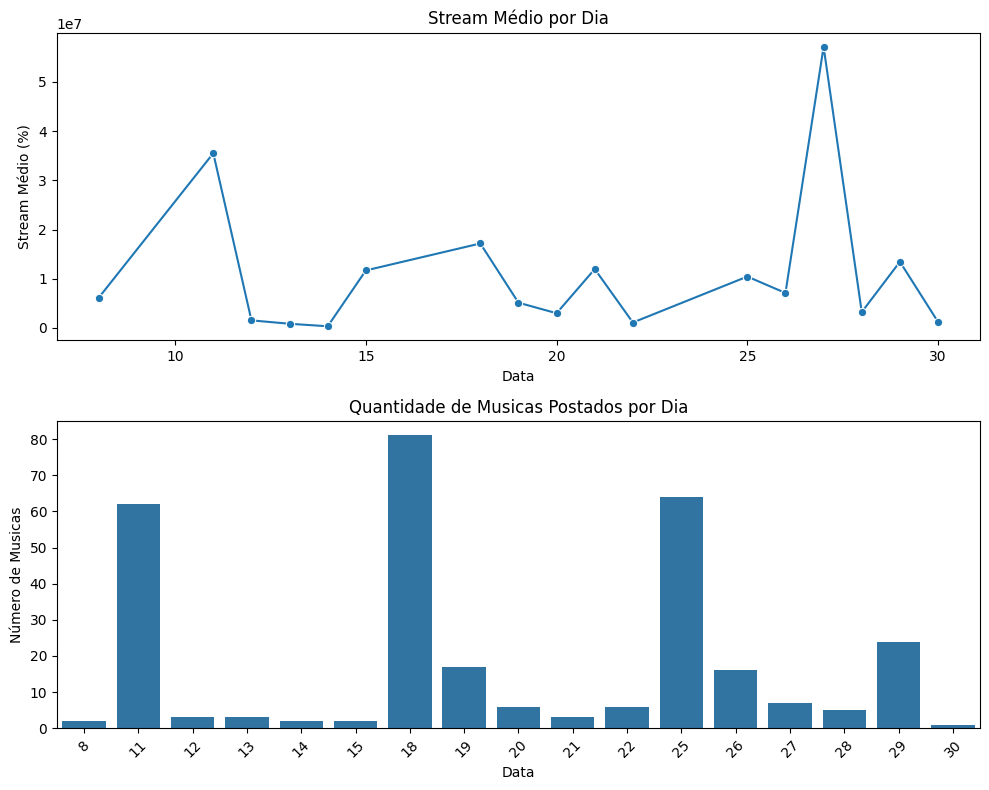

In [46]:
df_grouped = spotify_30_df.groupby('dias_na_plataforma_spoity').agg(
    stream_mean=('Stream', 'mean'), 
    video_count=('Stream', 'count')  # Contando vídeos por dia
).reset_index()
fig, ax1 = plt.subplots(2, 1, figsize=(10, 8)) 

# Gráfico 1: Engajamento médio por dia
sns.lineplot(data=df_grouped, x='dias_na_plataforma_spoity', y='stream_mean', marker='o', ax=ax1[0])
ax1[0].set_title('Stream Médio por Dia')
ax1[0].set_ylabel('Stream Médio (%)')
ax1[0].set_xlabel('Data')

# Gráfico 2: Quantidade de vídeos por dia
sns.barplot(data=df_grouped, x='dias_na_plataforma_spoity', y='video_count', ax=ax1[1])
ax1[1].set_title('Quantidade de Musicas Postados por Dia')
ax1[1].set_ylabel('Número de Musicas')
ax1[1].set_xlabel('Data')

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

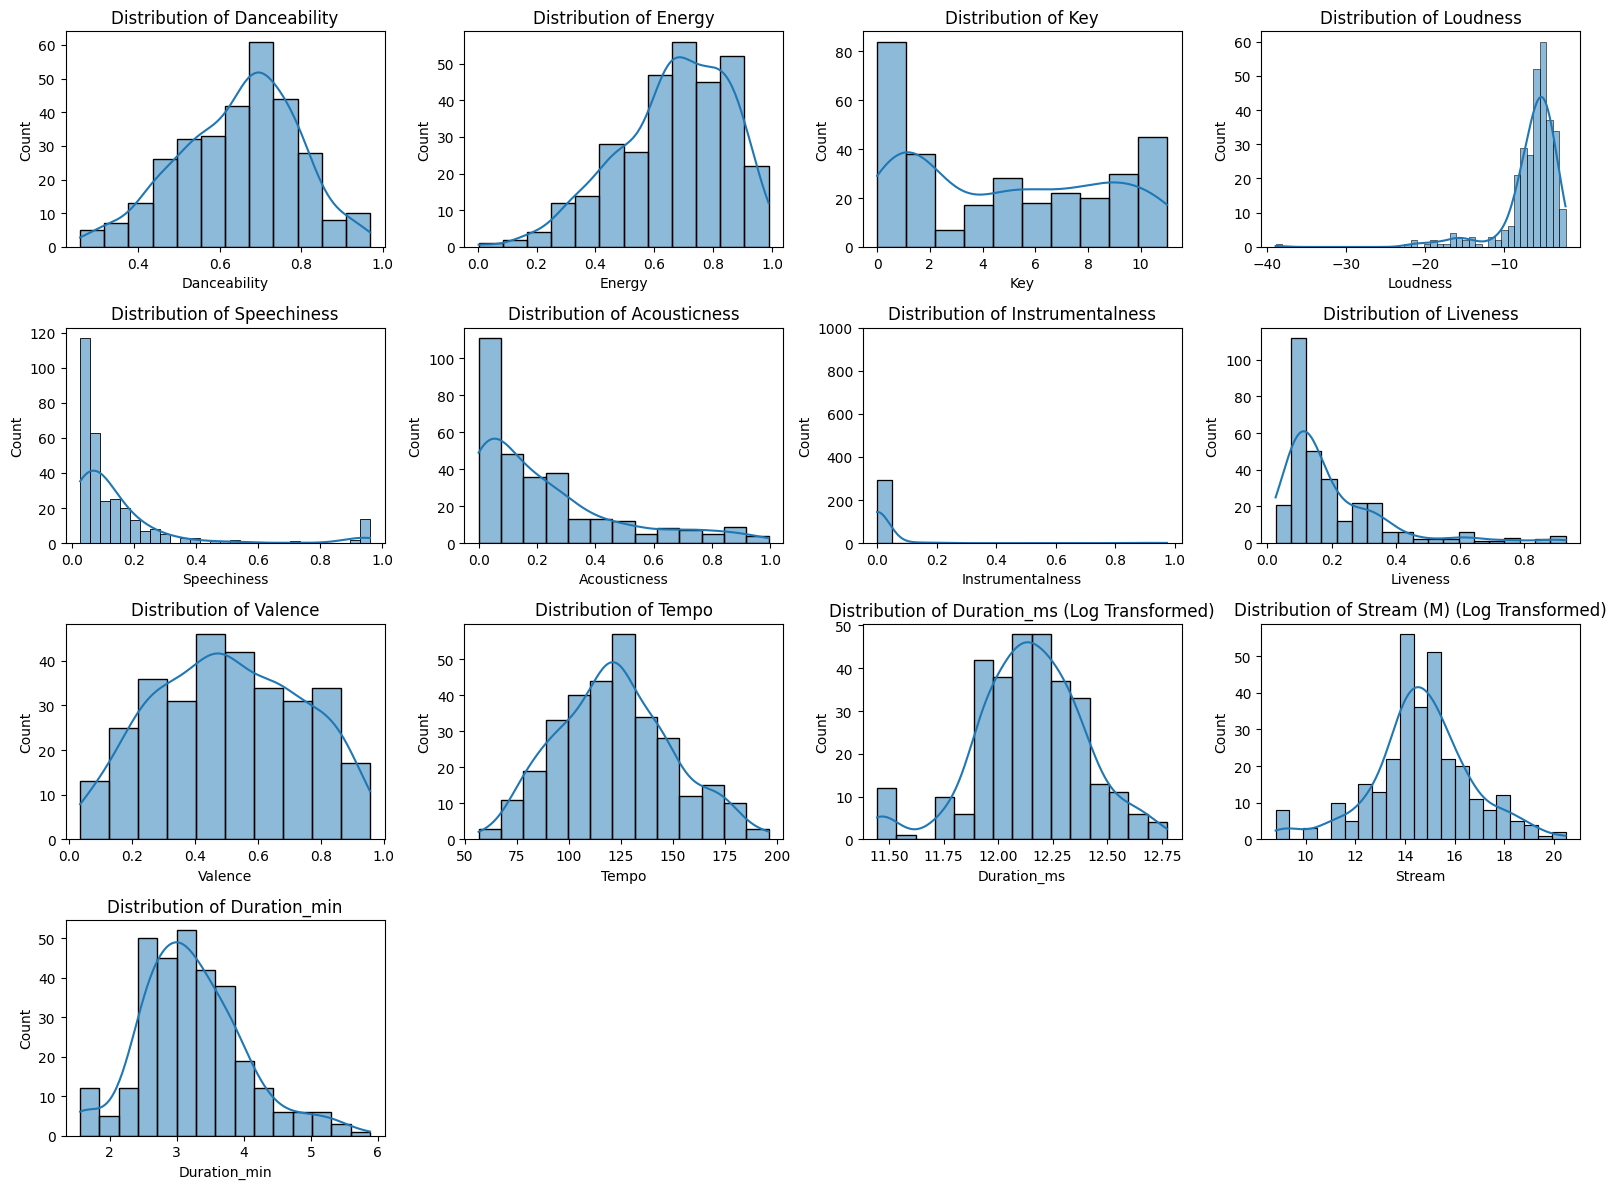

In [47]:
def get_scale_title(col_data, col_name):
    max_val = col_data.max()
    if max_val >= 1e9:
        scale = " (B)"
    elif max_val >= 1e6:
        scale = " (M)"
    else:
        scale = ""
    return f"{col_name}{scale}"

df_numeric = spotify_30_df.select_dtypes(include = ["float64"])


df_log = df_numeric.apply(lambda x: np.log1p(x) if x.max() > 1e5 else x)


plt.figure(figsize = (16, 12))
for i, col in enumerate(df_log, 1):
    plt.subplot(4, 4, i)
    
    
    if col == "Instrumentalness":
        sns.histplot(spotify_30_df[col], kde = True, binwidth = 0.05)
        plt.ylim(0, 1000)
    else:
        sns.histplot(df_log[col], kde = True)
    
    
    title = get_scale_title(df_numeric[col], col)
    plt.title(f"Distribution of {title} (Log Transformed)" if df_numeric[col].max() > 1e5 else f"Distribution of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

Total number of outliers in column Duration_min: 8
Lower limit: 1.218041666666667, Upper limit: 5.186508333333333
-----------------------------------------------------------
Total number of outliers in column Tempo: 0
Lower limit: 45.168, Upper limit: 196.92000000000002
-----------------------------------------------------------
Total number of outliers in column Stream: 43
Lower limit: -7931838.25, Upper limit: 15856491.75
-----------------------------------------------------------


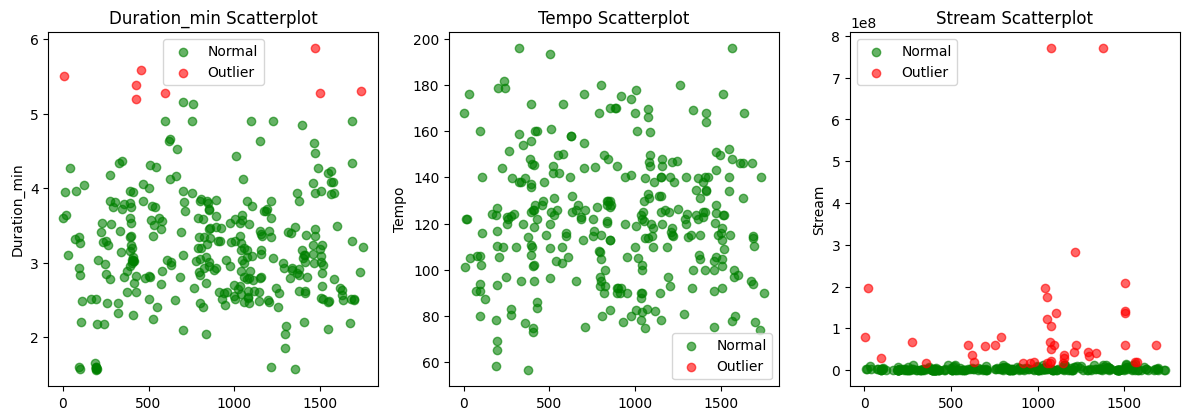

In [48]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


columns_to_check = ["Duration_min","Tempo","Stream"]


plt.figure(figsize = (12, 8))
for i, col in enumerate(columns_to_check, 1):

    outliers, lower, upper = find_outliers_iqr(spotify_30_df, col)

   
    normal_values = spotify_30_df[(spotify_30_df[col] >= lower) & (spotify_30_df[col] <= upper)]

    
    plt.subplot(2, 3, i)
    plt.scatter(normal_values.index, normal_values[col], label = "Normal", alpha = 0.6, c = "green")
    plt.scatter(outliers.index, outliers[col], label = "Outlier", alpha=0.6, c = "red")
    plt.title(f"{col} Scatterplot")
    plt.ylabel(col)
    plt.legend()

    
    print(f"Total number of outliers in column {col}: {len(outliers)}")
    print(f"Lower limit: {lower}, Upper limit: {upper}")
    print("-" * 59)

plt.tight_layout()
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3512931592.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_30_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3512931592.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_30_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3512931592.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

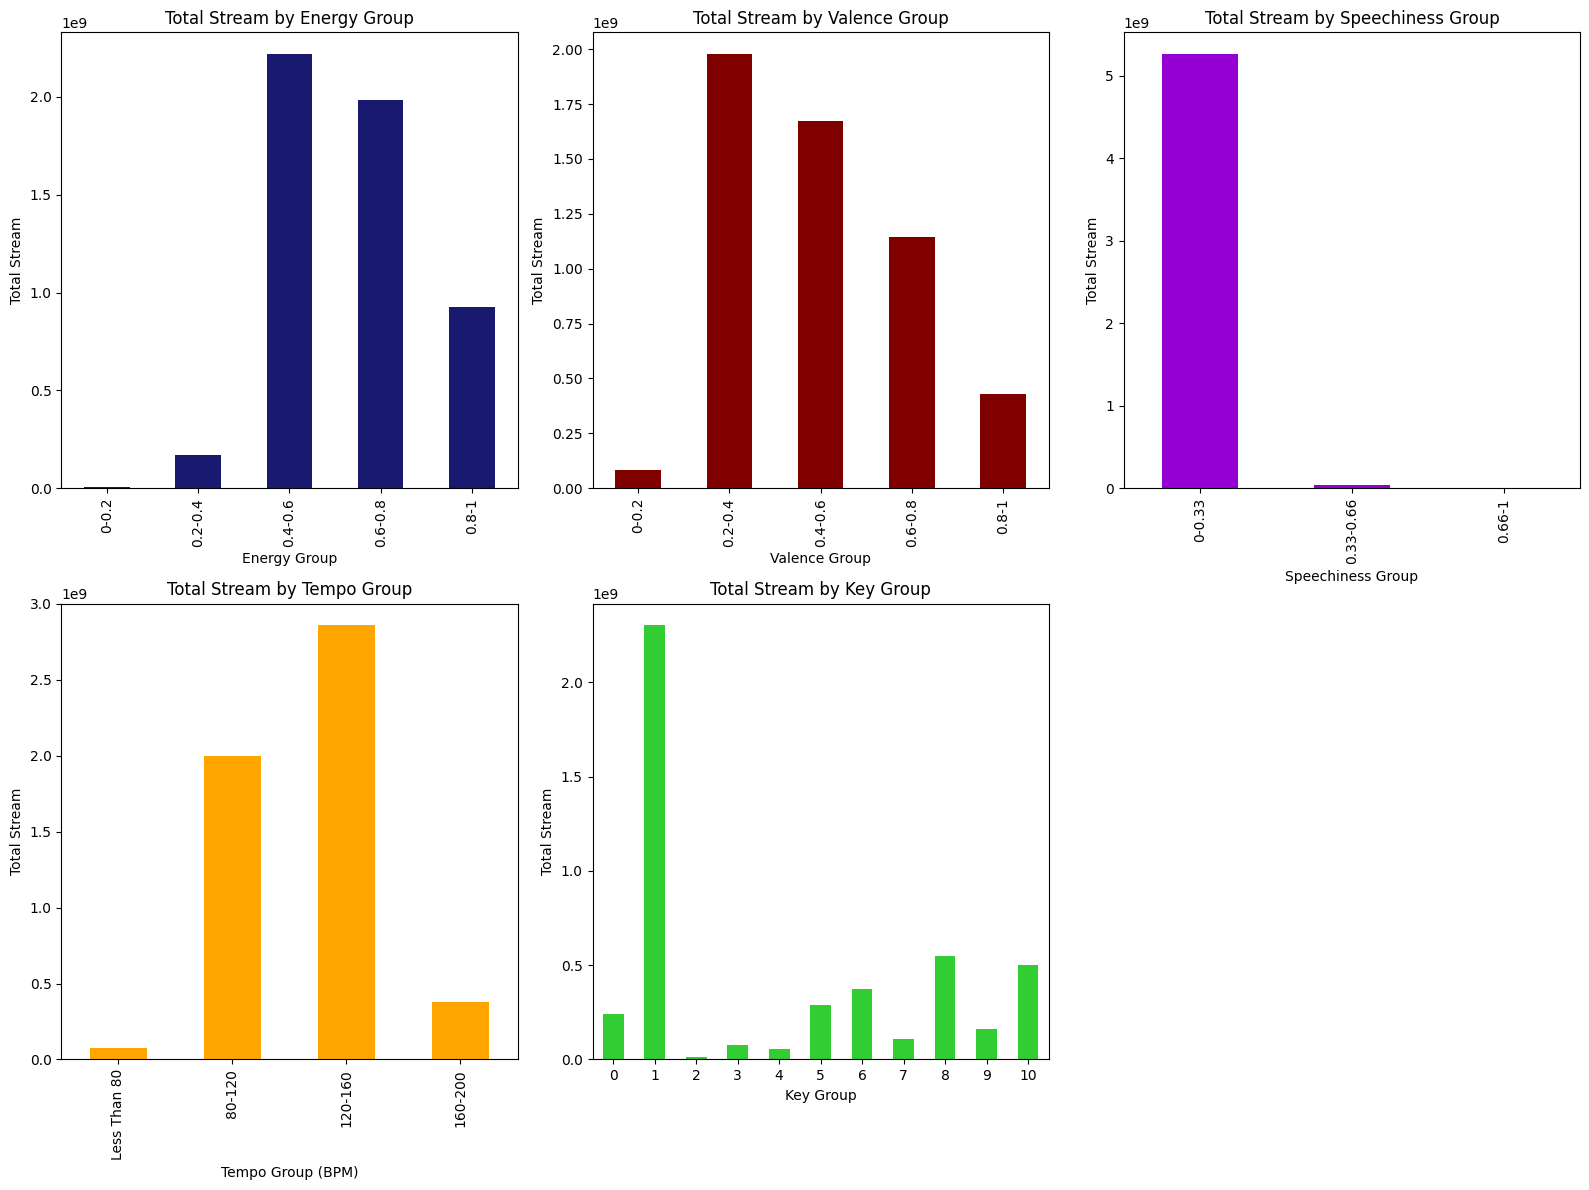

In [49]:
energy_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
valence_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
speechiness_bins = [0, 0.33, 0.66, 1]
tempo_bins = [0, 80, 120, 160, 200]

# Grouping the features into bins
spotify_30_df["Energy_group"] = pd.cut(spotify_30_df["Energy"], bins = energy_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_30_df["Valence_group"] = pd.cut(spotify_30_df["Valence"], bins = valence_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_30_df["Speechiness_group"] = pd.cut(spotify_30_df["Speechiness"], bins = speechiness_bins, labels = ["0-0.33", "0.33-0.66", "0.66-1"])
spotify_30_df["Tempo_group"] = pd.cut(spotify_30_df["Tempo"], bins = tempo_bins, labels = ["Less Than 80", "80-120", "120-160", "160-200"])
spotify_30_df["Key_group"] = pd.cut(spotify_30_df["Key"], bins = range(0, 12), labels = [f"{i}" for i in range(11)])

# Now that we have done the grouping, let's start visualization
plt.figure(figsize = (16, 12))

# Energy
plt.subplot(2, 3, 1)
spotify_30_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
plt.title("Total Stream by Energy Group")
plt.xlabel("Energy Group")
plt.ylabel("Total Stream")

# Valence
plt.subplot(2, 3, 2)
spotify_30_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
plt.title("Total Stream by Valence Group")
plt.xlabel("Valence Group")
plt.ylabel("Total Stream")

# Speechiness
plt.subplot(2, 3, 3)
spotify_30_df.groupby("Speechiness_group")["Stream"].sum().plot(kind = "bar", color = "darkviolet")
plt.title("Total Stream by Speechiness Group")
plt.xlabel("Speechiness Group")
plt.ylabel("Total Stream")

# Tempo
plt.subplot(2, 3, 4)
spotify_30_df.groupby("Tempo_group")["Stream"].sum().plot(kind = "bar", color = "orange")
plt.title("Total Stream by Tempo Group")
plt.xlabel("Tempo Group (BPM)")
plt.ylabel("Total Stream")

# Key
plt.subplot(2, 3, 5)
spotify_30_df.groupby("Key_group")["Stream"].sum().plot(kind = "bar", color = "limegreen")
plt.title("Total Stream by Key Group")
plt.xlabel("Key Group")
plt.ylabel("Total Stream")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

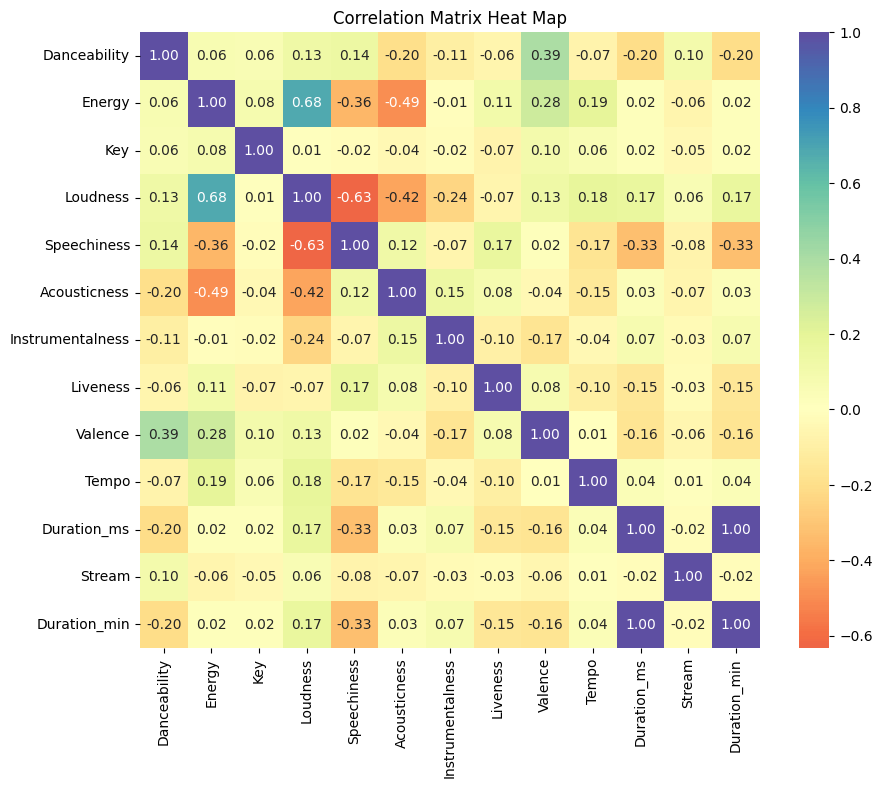

In [50]:
corr_matrix = df_numeric.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Spectral", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

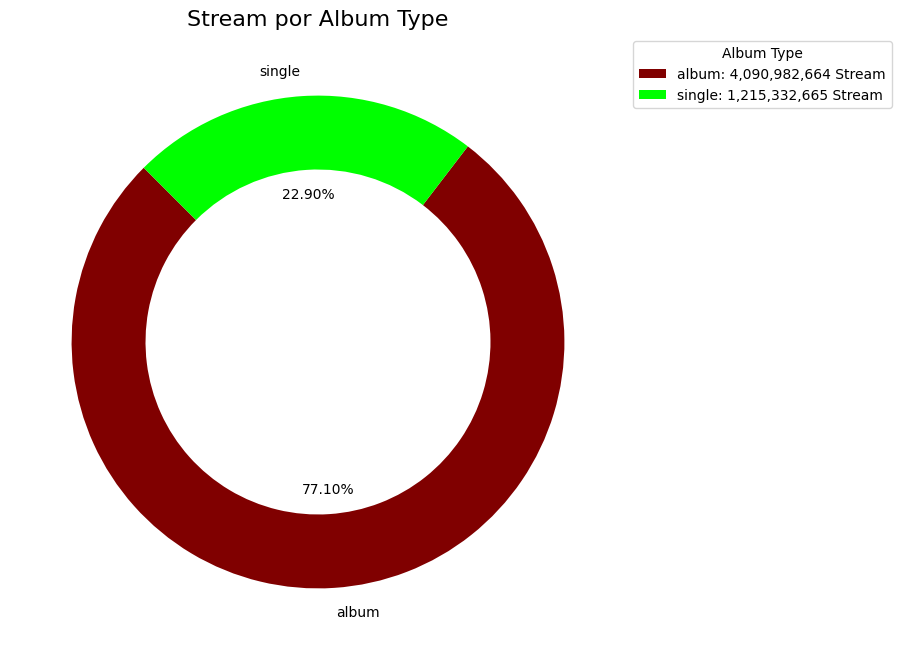

In [51]:
album_views = spotify_30_df.groupby("Album_type")["Stream"].sum()

# Now let's create the Donut Chart.
plt.figure(figsize = (8, 8))

plt.pie(album_views, labels = album_views.index, autopct = "%1.2f%%", startangle = 135, colors = ["maroon", "lime", "navy"], wedgeprops = dict(width = 0.3))
plt.title("Stream por Album Type", fontsize = 16)
plt.legend(labels = [f"{label}: {value:,.0f} Stream" for label, value in zip(album_views.index, album_views)],
           title = "Album Type", loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1))

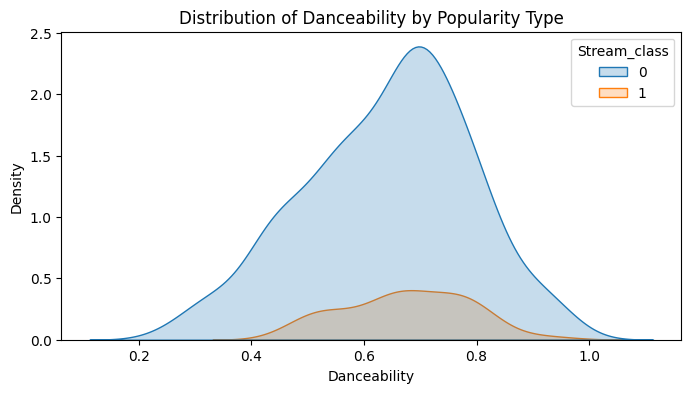

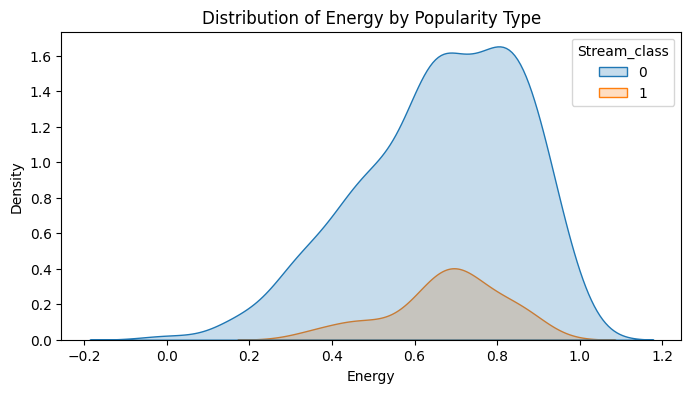

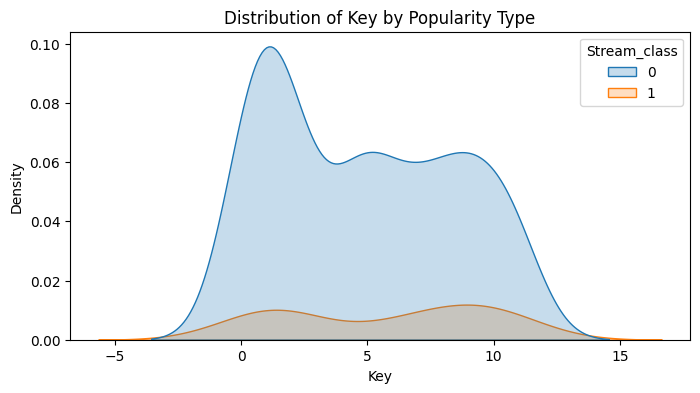

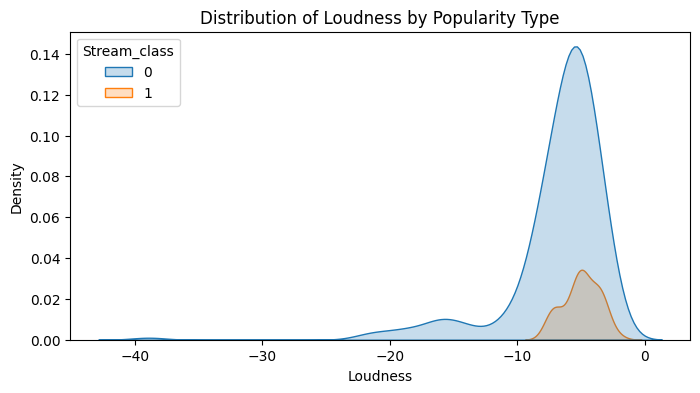

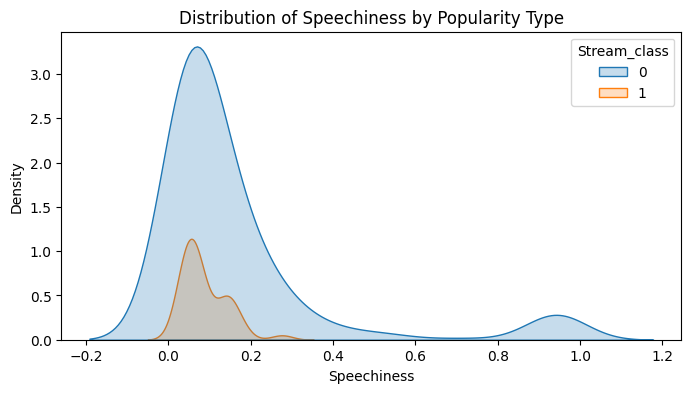

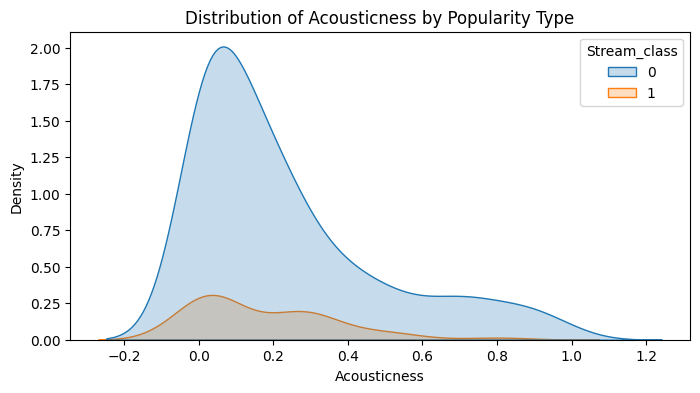

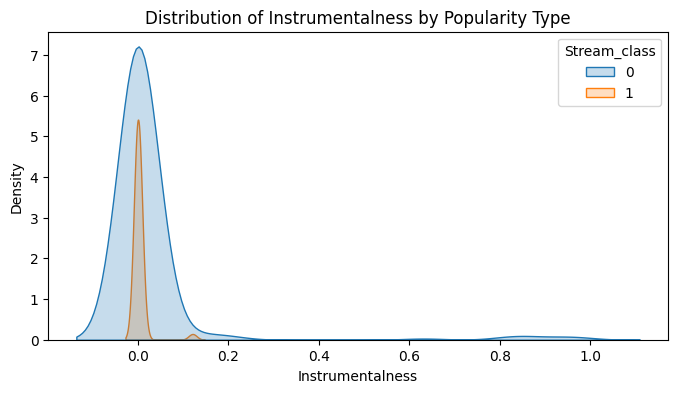

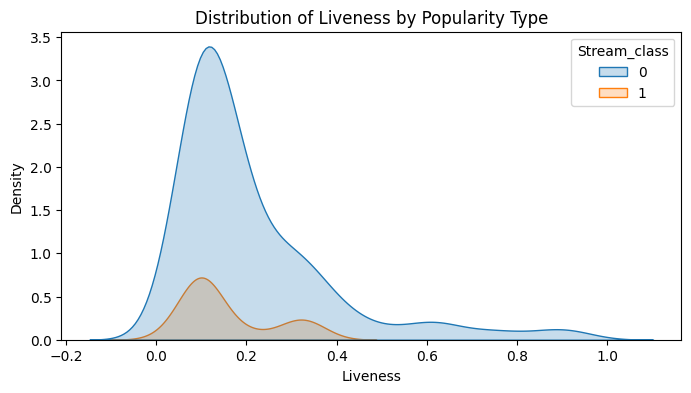

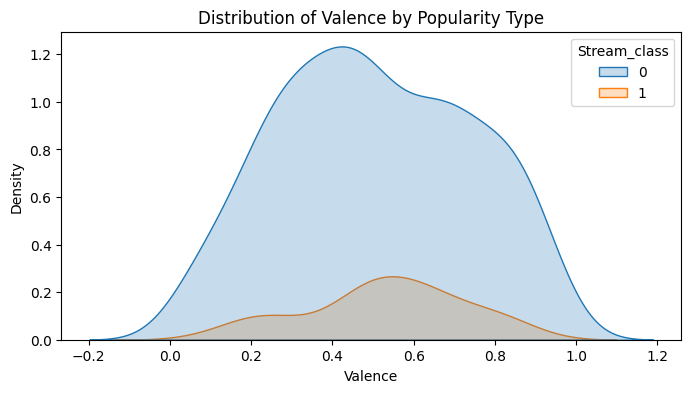

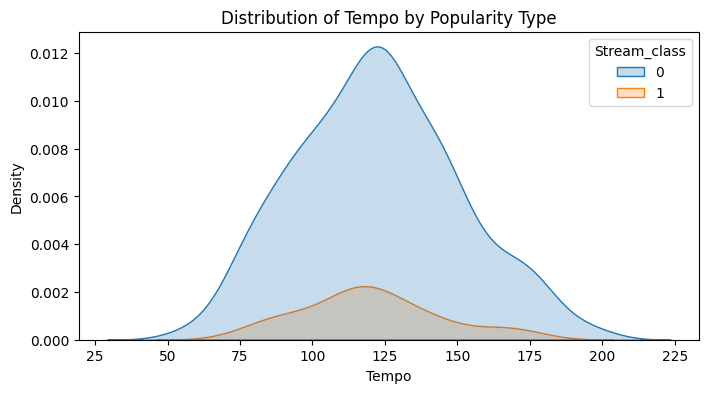

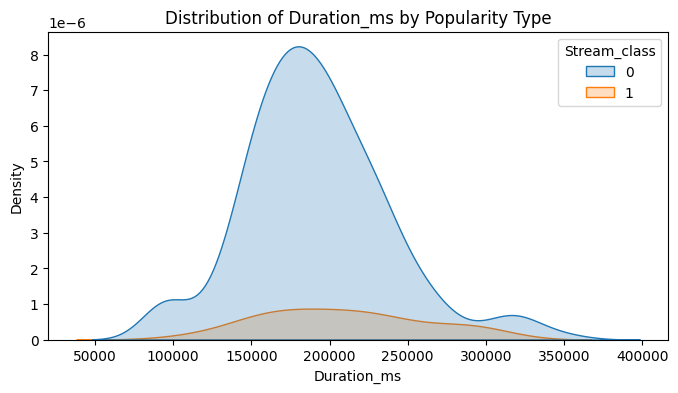

In [52]:
audio_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Duration_ms']
for feature in audio_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=spotify_30_df, x=feature, hue='Stream_class', fill=True)
    plt.title(f'Distribution of {feature} by Popularity Type')
    plt.show()

# Tres meses

In [63]:
spotify_90_df.head(3)

index     Artist                                        Url_spotify  \
1      6   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
6     31  Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
7     33  Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   

                                               Track  \
1  New Gold (feat. Tame Impala and Bootie Brown) ...   
6                                         Lux Æterna   
7                                  Screaming Suicide   

                                               Album Album_type  \
1  New Gold (feat. Tame Impala and Bootie Brown) ...     single   
6                                         Lux Æterna     single   
7                                  Screaming Suicide     single   

                                    Uri  Danceability  Energy   Key  ...  \
1  spotify:track:2c3KCGq6UojB2c8UAFrRON         0.716   0.897   4.0  ...   
6  spotify:track:3pwmJJRlr8nXNN9PFD18np         0.386   0.996  11.0  ...   
7  spotify:track:6ZCh9hBeFzMIPycRnyPqZT         0.425   0.972   4.0  ...   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms      Stream  \
1          0.262000     0.325    0.358  127.030     274142.0  10666154.0   
6          0.000836     0.116    0.188  130.573     205680.0  20061385.0   
7          0.020200     0.239    0.282  101.125     330453.0   3905429.0   

           upload_date  dias_na_plataforma  spotify_upload  \
1  2022-11-18 20:30:00                  80      2022-11-18   
6  2022-11-28 15:00:20                  70      2022-11-28   
7  2023-01-19 23:00:19                  18      2023-01-19   

  dias_na_plataforma_spoity  
1                        81  
6                        71  
7                        19  

[3 rows x 23 columns]

In [64]:
spotify_90_df['Stream']

1        10666154.0
6        20061385.0
7         3905429.0
9       162685755.0
11       18501860.0
           ...     
1728     77111809.0
1736            NaN
1750            NaN
1751            NaN
1752            NaN
Name: Stream, Length: 1071, dtype: float64

In [65]:
spotify_90_df["Duration_min"] = spotify_90_df["Duration_ms"] / 60000

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\1080512920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_90_df["Duration_min"] = spotify_90_df["Duration_ms"] / 60000


In [66]:
print(f'Numero de diferentes artistas: {len(set(spotify_90_df.Artist))}')

Numero de diferentes artistas: 565


In [67]:
spotify_90_df['artist_number'] = spotify_90_df['Artist'].str.split(',').str.len()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\1513090611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_90_df['artist_number'] = spotify_90_df['Artist'].str.split(',').str.len()


In [68]:
columns_drop=['index', 'Artist', 'Track', 'Album']
spotify_90_df=spotify_90_df.drop(columns=columns_drop)

In [69]:
print("Valor maximo de streams: ",spotify_90_df.Stream.max())
print("Valor minimo de streams: ",spotify_90_df.Stream.min())
print("Valor medio de streams: ",spotify_90_df.Stream.mean())
print("Numero de amostras: ",len(spotify_90_df))

Valor maximo de streams:  771282498.0
Valor minimo de streams:  6574.0
Valor medio de streams:  18778078.2150333
Numero de amostras:  1071


In [70]:
spotify_90_df["Stream_class"] = spotify_90_df["Stream"].apply(lambda x: 1 if x >= 18778078 else 0)

In [71]:
# Let's identify the columns with a value between 0-1.
columns_to_check = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence']

# Checking values outside the 0-1 range and printing.
for col in columns_to_check:
    out_of_range = spotify_90_df[(spotify_90_df[col] < 0) | (spotify_90_df[col] > 1)]
    print(f"In the {col} column, {len(out_of_range)} values were found outside the 0-1 range.")
    if not out_of_range.empty:
        print(out_of_range[[col]])
    print('-' * 74)

In the Danceability column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Energy column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Speechiness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Acousticness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Instrumentalness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Liveness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Valence column, 0 values were found outside the 0-1 range.
-----------------------------------------------------------------

## Graficos

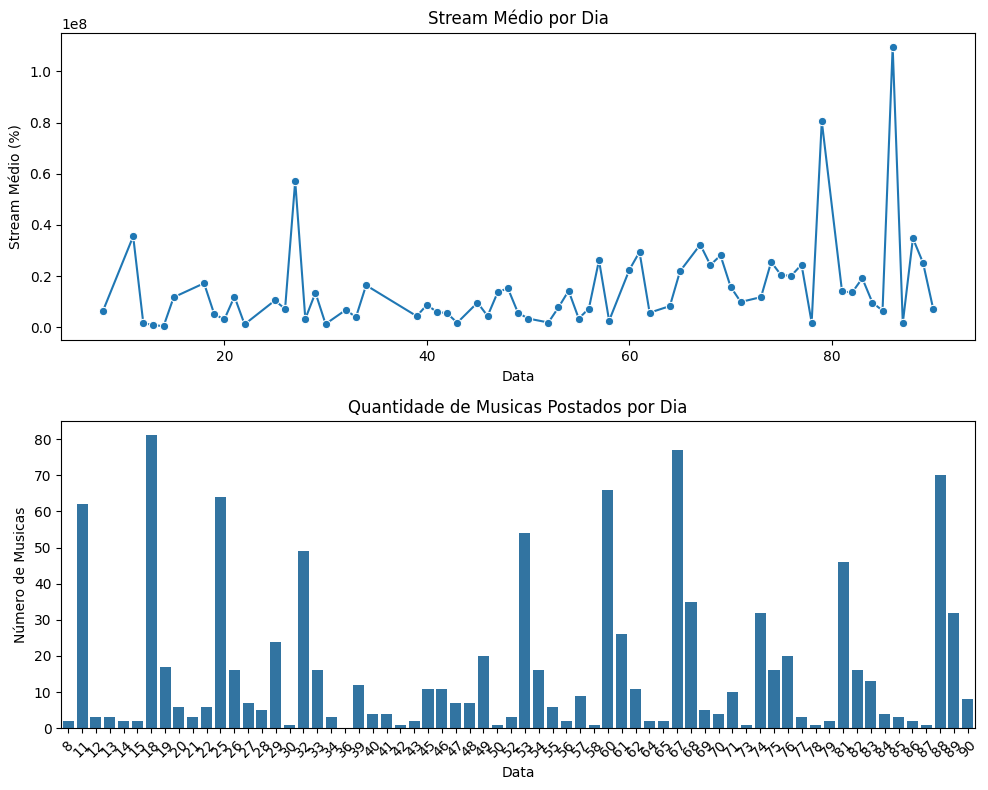

In [72]:
df_grouped = spotify_90_df.groupby('dias_na_plataforma_spoity').agg(
    stream_mean=('Stream', 'mean'), 
    video_count=('Stream', 'count')  # Contando vídeos por dia
).reset_index()
fig, ax1 = plt.subplots(2, 1, figsize=(10, 8)) 

# Gráfico 1: Engajamento médio por dia
sns.lineplot(data=df_grouped, x='dias_na_plataforma_spoity', y='stream_mean', marker='o', ax=ax1[0])
ax1[0].set_title('Stream Médio por Dia')
ax1[0].set_ylabel('Stream Médio (%)')
ax1[0].set_xlabel('Data')

# Gráfico 2: Quantidade de vídeos por dia
sns.barplot(data=df_grouped, x='dias_na_plataforma_spoity', y='video_count', ax=ax1[1])
ax1[1].set_title('Quantidade de Musicas Postados por Dia')
ax1[1].set_ylabel('Número de Musicas')
ax1[1].set_xlabel('Data')

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

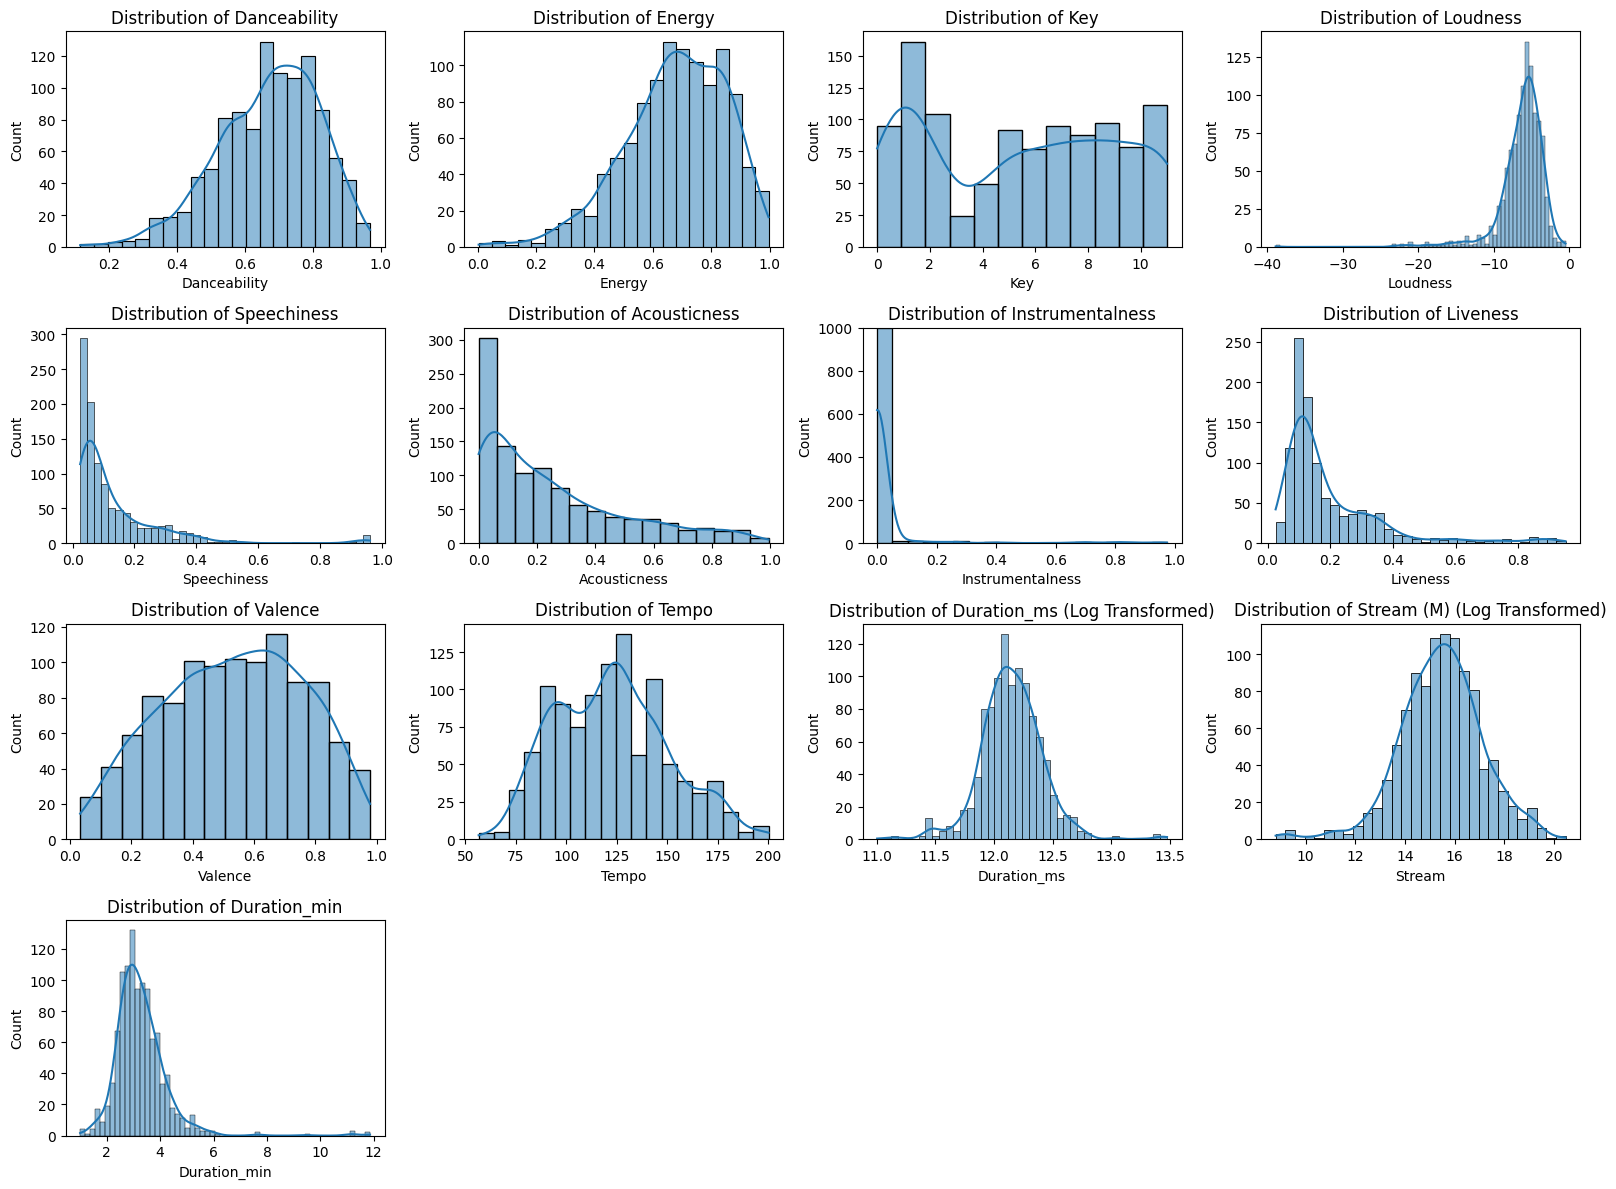

In [73]:
def get_scale_title(col_data, col_name):
    max_val = col_data.max()
    if max_val >= 1e9:
        scale = " (B)"
    elif max_val >= 1e6:
        scale = " (M)"
    else:
        scale = ""
    return f"{col_name}{scale}"

df_numeric = spotify_90_df.select_dtypes(include = ["float64"])


df_log = df_numeric.apply(lambda x: np.log1p(x) if x.max() > 1e5 else x)


plt.figure(figsize = (16, 12))
for i, col in enumerate(df_log, 1):
    plt.subplot(4, 4, i)
    
    
    if col == "Instrumentalness":
        sns.histplot(spotify_90_df[col], kde = True, binwidth = 0.05)
        plt.ylim(0, 1000)
    else:
        sns.histplot(df_log[col], kde = True)
    
    
    title = get_scale_title(df_numeric[col], col)
    plt.title(f"Distribution of {title} (Log Transformed)" if df_numeric[col].max() > 1e5 else f"Distribution of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

Total number of outliers in column Duration_min: 38
Lower limit: 1.2586291666666674, Upper limit: 5.135462499999999
-----------------------------------------------------------
Total number of outliers in column Tempo: 0
Lower limit: 39.924249999999944, Upper limit: 200.08225000000007
-----------------------------------------------------------
Total number of outliers in column Stream: 126
Lower limit: -17116234.0, Upper limit: 33571702.0
-----------------------------------------------------------


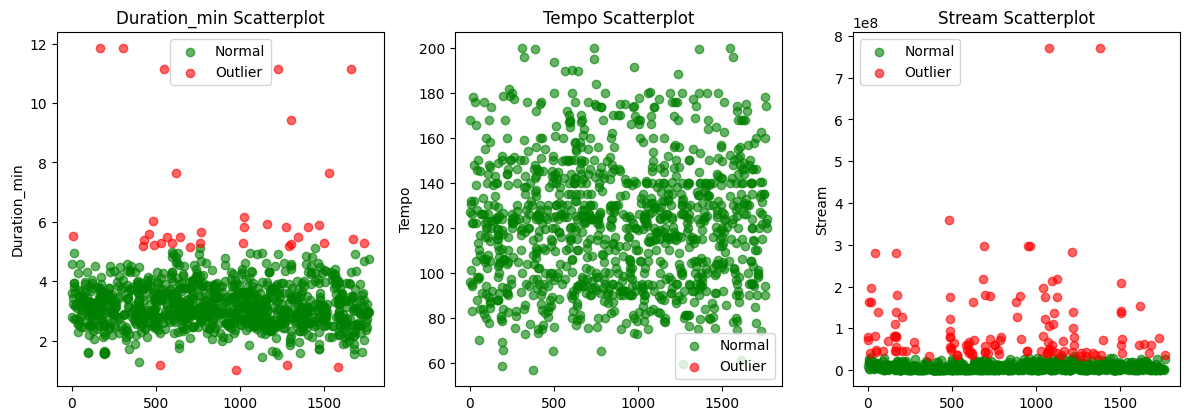

In [74]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


columns_to_check = ["Duration_min","Tempo","Stream"]


plt.figure(figsize = (12, 8))
for i, col in enumerate(columns_to_check, 1):

    outliers, lower, upper = find_outliers_iqr(spotify_90_df, col)

   
    normal_values = spotify_90_df[(spotify_90_df[col] >= lower) & (spotify_90_df[col] <= upper)]

    
    plt.subplot(2, 3, i)
    plt.scatter(normal_values.index, normal_values[col], label = "Normal", alpha = 0.6, c = "green")
    plt.scatter(outliers.index, outliers[col], label = "Outlier", alpha=0.6, c = "red")
    plt.title(f"{col} Scatterplot")
    plt.ylabel(col)
    plt.legend()

    
    print(f"Total number of outliers in column {col}: {len(outliers)}")
    print(f"Lower limit: {lower}, Upper limit: {upper}")
    print("-" * 59)

plt.tight_layout()
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\2722754753.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_90_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\2722754753.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_90_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\2722754753.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

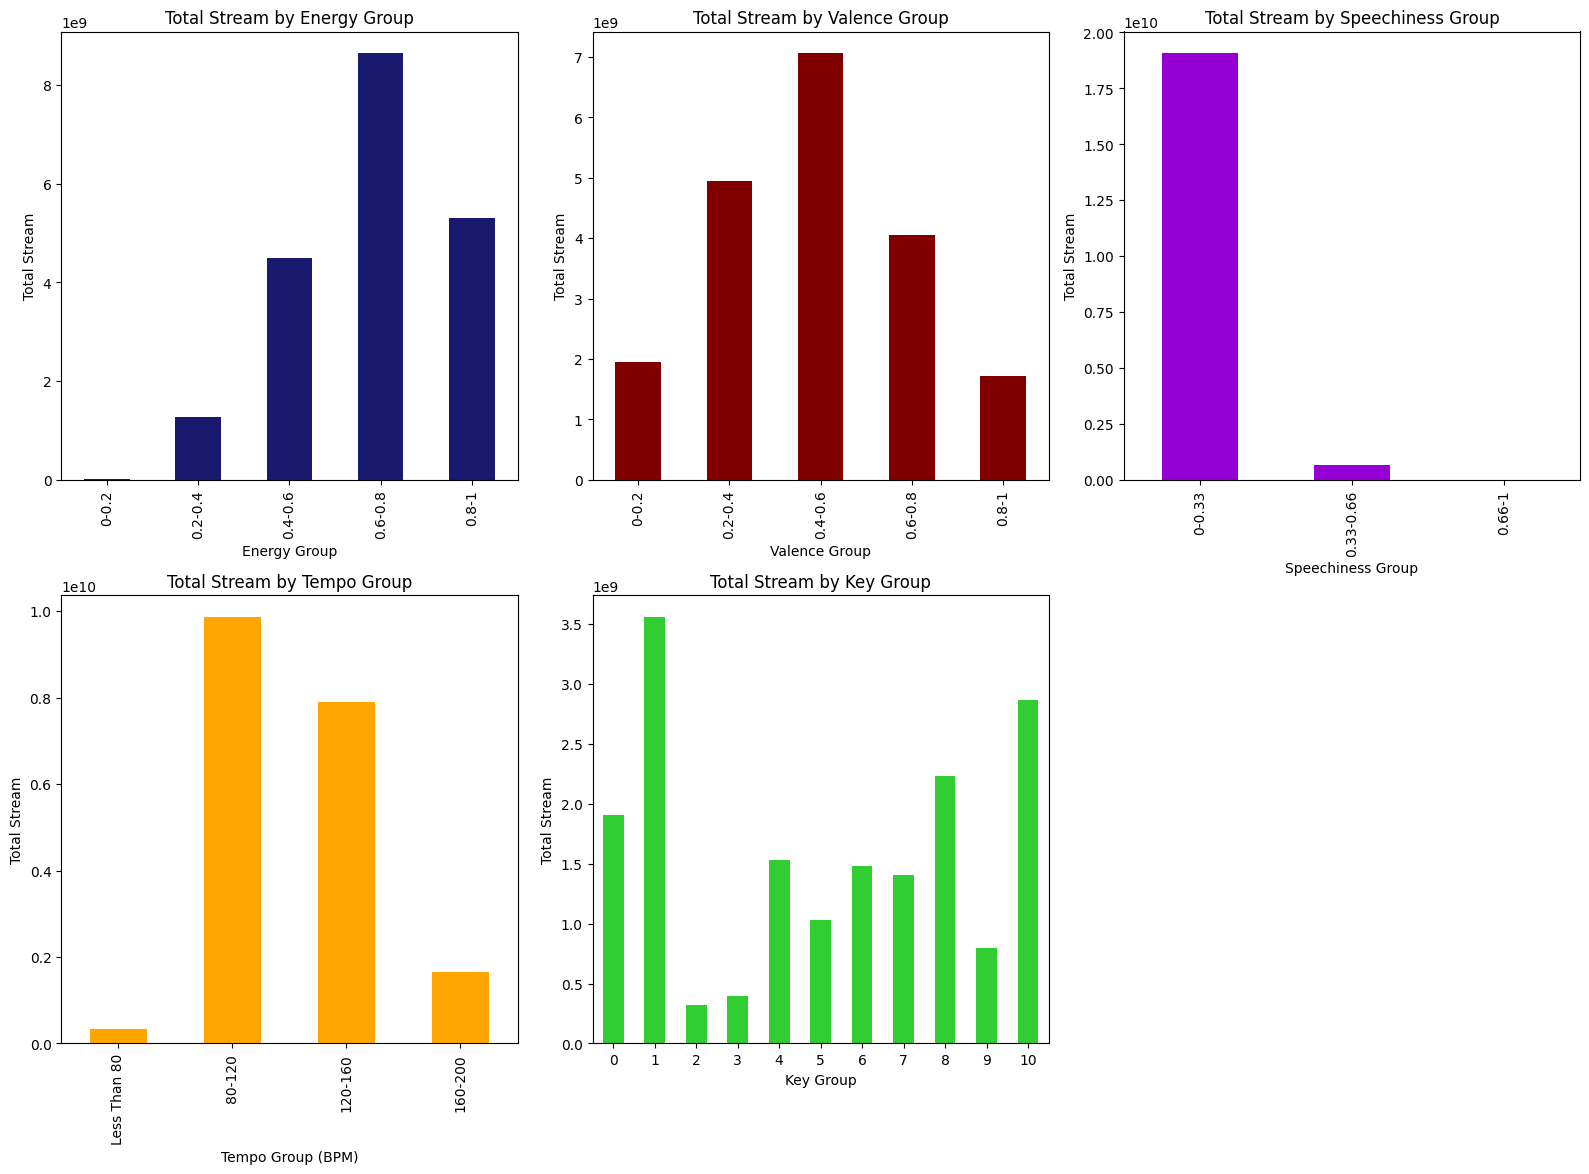

In [75]:
energy_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
valence_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
speechiness_bins = [0, 0.33, 0.66, 1]
tempo_bins = [0, 80, 120, 160, 200]

# Grouping the features into bins
spotify_90_df["Energy_group"] = pd.cut(spotify_90_df["Energy"], bins = energy_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_90_df["Valence_group"] = pd.cut(spotify_90_df["Valence"], bins = valence_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_90_df["Speechiness_group"] = pd.cut(spotify_90_df["Speechiness"], bins = speechiness_bins, labels = ["0-0.33", "0.33-0.66", "0.66-1"])
spotify_90_df["Tempo_group"] = pd.cut(spotify_90_df["Tempo"], bins = tempo_bins, labels = ["Less Than 80", "80-120", "120-160", "160-200"])
spotify_90_df["Key_group"] = pd.cut(spotify_90_df["Key"], bins = range(0, 12), labels = [f"{i}" for i in range(11)])

# Now that we have done the grouping, let's start visualization
plt.figure(figsize = (16, 12))

# Energy
plt.subplot(2, 3, 1)
spotify_90_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
plt.title("Total Stream by Energy Group")
plt.xlabel("Energy Group")
plt.ylabel("Total Stream")

# Valence
plt.subplot(2, 3, 2)
spotify_90_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
plt.title("Total Stream by Valence Group")
plt.xlabel("Valence Group")
plt.ylabel("Total Stream")

# Speechiness
plt.subplot(2, 3, 3)
spotify_90_df.groupby("Speechiness_group")["Stream"].sum().plot(kind = "bar", color = "darkviolet")
plt.title("Total Stream by Speechiness Group")
plt.xlabel("Speechiness Group")
plt.ylabel("Total Stream")

# Tempo
plt.subplot(2, 3, 4)
spotify_90_df.groupby("Tempo_group")["Stream"].sum().plot(kind = "bar", color = "orange")
plt.title("Total Stream by Tempo Group")
plt.xlabel("Tempo Group (BPM)")
plt.ylabel("Total Stream")

# Key
plt.subplot(2, 3, 5)
spotify_90_df.groupby("Key_group")["Stream"].sum().plot(kind = "bar", color = "limegreen")
plt.title("Total Stream by Key Group")
plt.xlabel("Key Group")
plt.ylabel("Total Stream")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

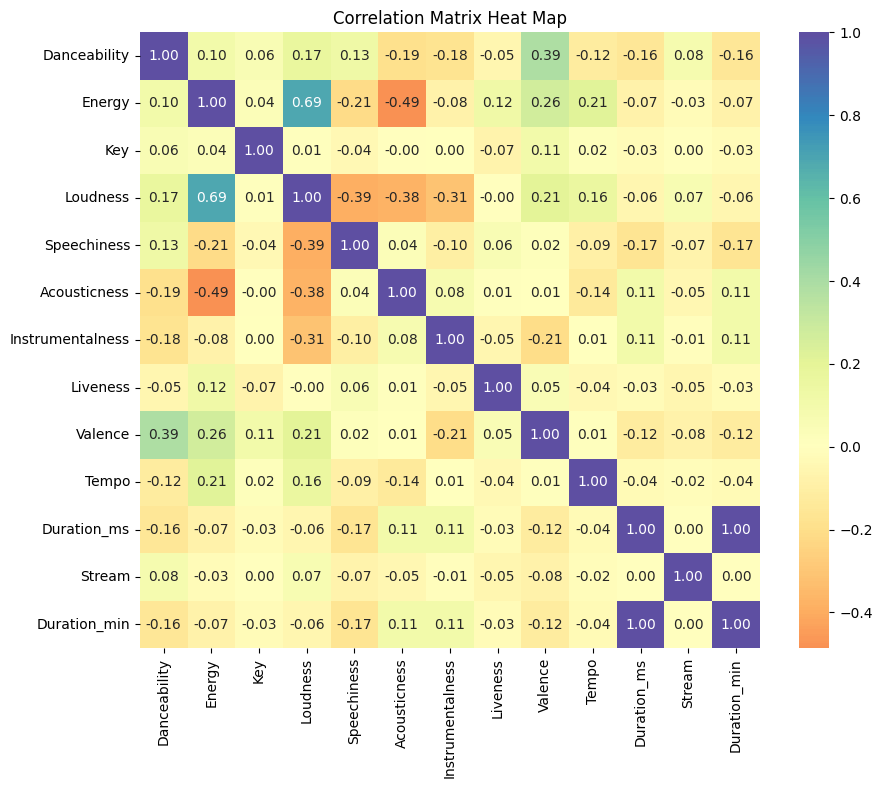

In [76]:
corr_matrix = df_numeric.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Spectral", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

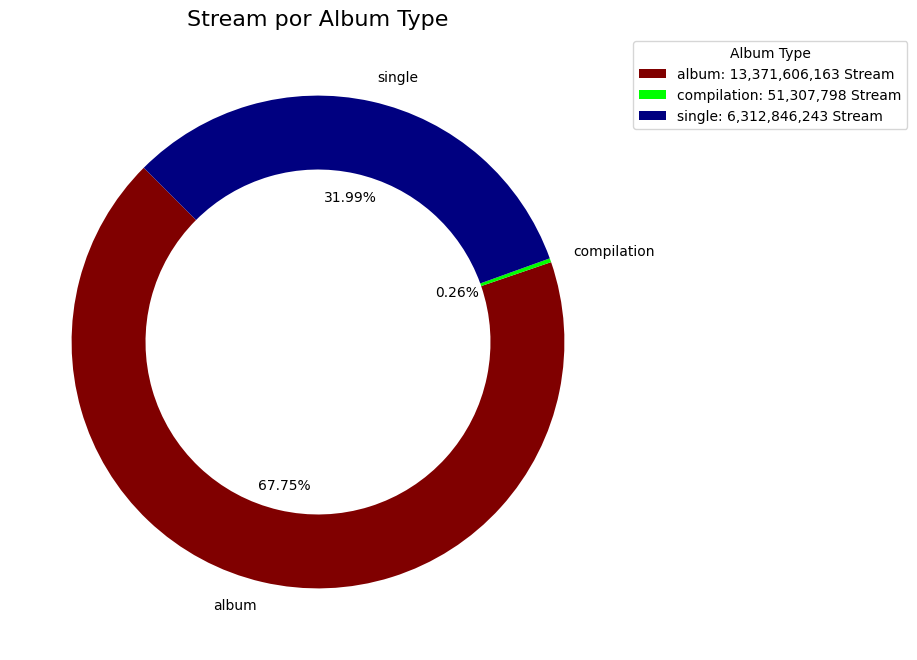

In [77]:
album_views = spotify_90_df.groupby("Album_type")["Stream"].sum()

# Now let's create the Donut Chart.
plt.figure(figsize = (8, 8))

plt.pie(album_views, labels = album_views.index, autopct = "%1.2f%%", startangle = 135, colors = ["maroon", "lime", "navy"], wedgeprops = dict(width = 0.3))
plt.title("Stream por Album Type", fontsize = 16)
plt.legend(labels = [f"{label}: {value:,.0f} Stream" for label, value in zip(album_views.index, album_views)],
           title = "Album Type", loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1))

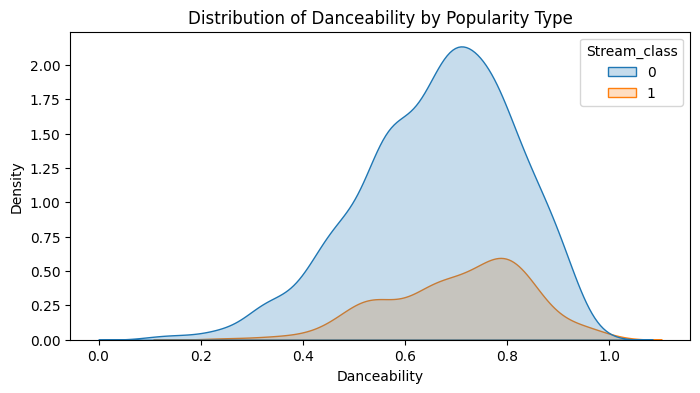

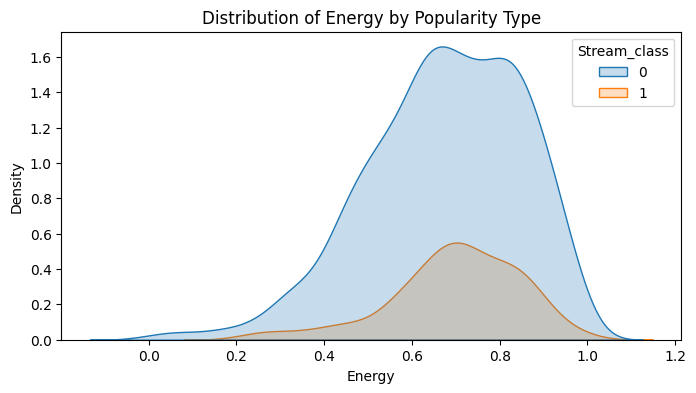

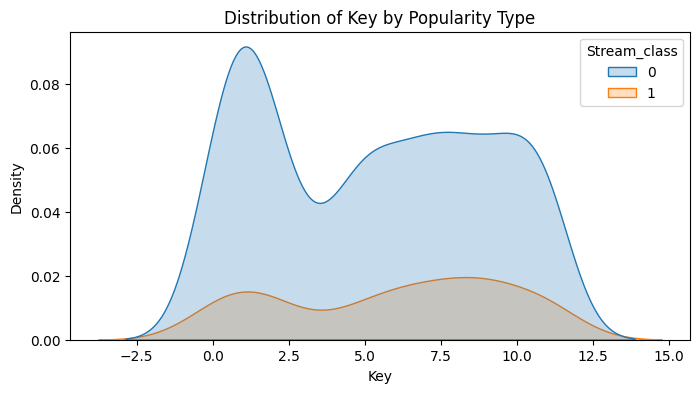

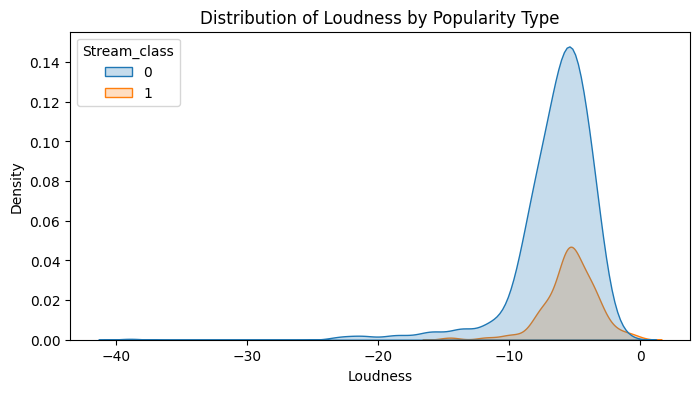

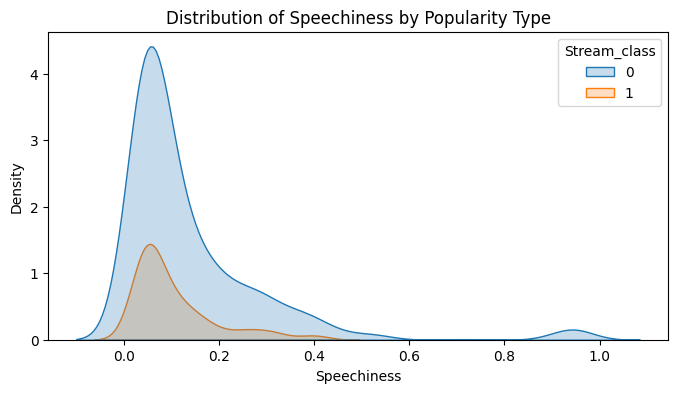

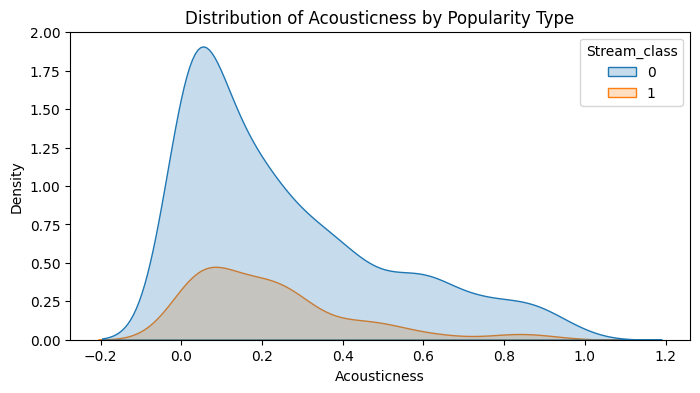

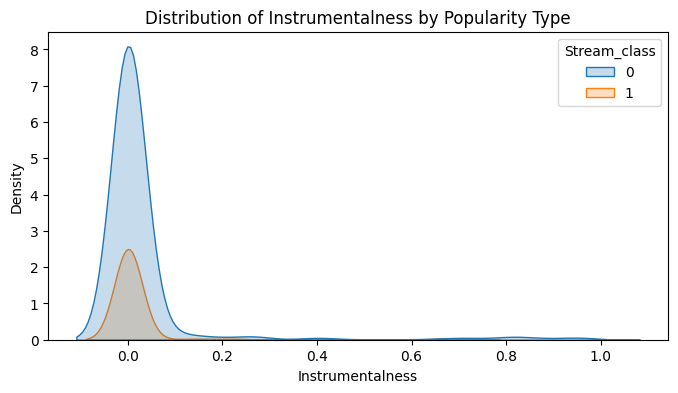

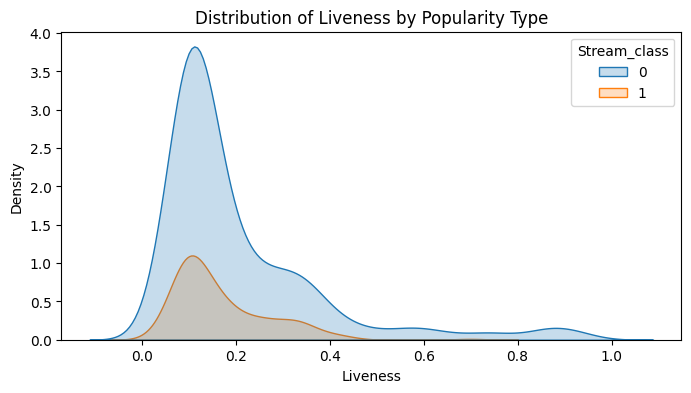

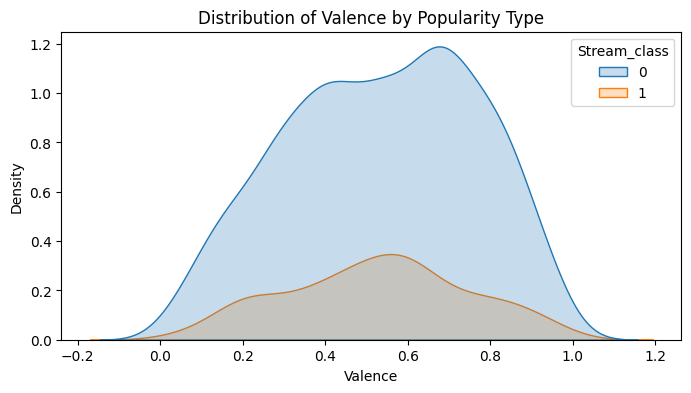

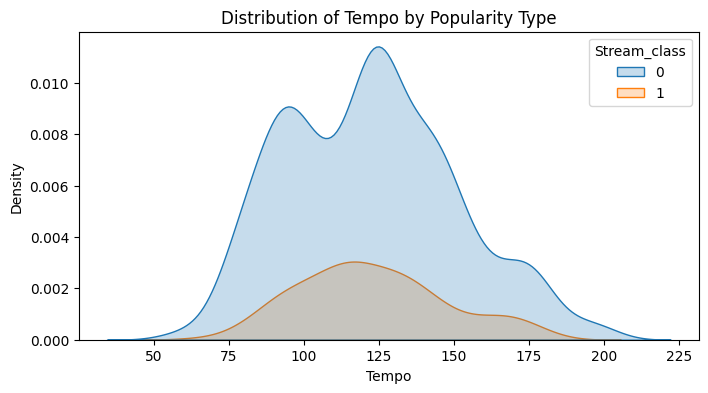

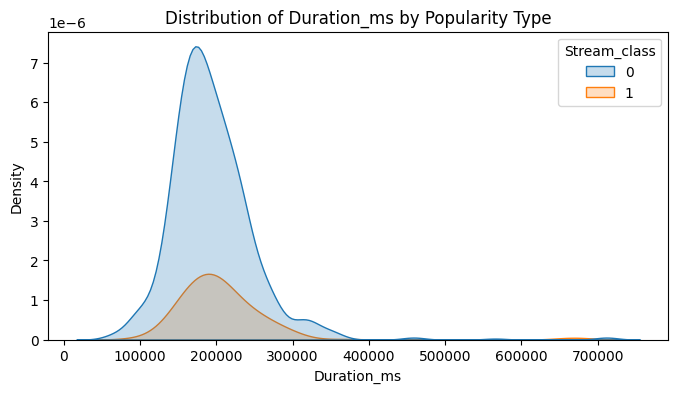

In [78]:
audio_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Duration_ms']
for feature in audio_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=spotify_90_df, x=feature, hue='Stream_class', fill=True)
    plt.title(f'Distribution of {feature} by Popularity Type')
    plt.show()

# Doze meses

In [79]:
spotify_365_df.head(3)

index    Artist                                        Url_spotify  \
0      2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      6  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      7  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                               Track  \
0      New Gold (feat. Tame Impala and Bootie Brown)   
1  New Gold (feat. Tame Impala and Bootie Brown) ...   
2                  Cracker Island (feat. Thundercat)   

                                               Album Album_type  \
0      New Gold (feat. Tame Impala and Bootie Brown)     single   
1  New Gold (feat. Tame Impala and Bootie Brown) ...     single   
2                  Cracker Island (feat. Thundercat)     single   

                                    Uri  Danceability  Energy  Key  ...  \
0  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923  1.0  ...   
1  spotify:track:2c3KCGq6UojB2c8UAFrRON         0.716   0.897  4.0  ...   
2  spotify:track:2W3ZpQg9i6lE6kmHbcdu9N         0.741   0.913  2.0  ...   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms      Stream  \
0            0.0469     0.116    0.551  108.014     215150.0  63063467.0   
1            0.2620     0.325    0.358  127.030     274142.0  10666154.0   
2            0.1030     0.325    0.643  120.012     213750.0  42671901.0   

           upload_date  dias_na_plataforma  spotify_upload  \
0  2022-08-31 17:21:40                 159      2022-08-31   
1  2022-11-18 20:30:00                  80      2022-11-18   
2  2022-07-28 16:00:11                 193      2022-06-22   

  dias_na_plataforma_spoity  
0                       160  
1                        81  
2                       230  

[3 rows x 23 columns]

In [80]:
spotify_365_df['Stream']

0       63063467.0
1       10666154.0
2       42671901.0
3       28529840.0
6       20061385.0
           ...    
1763     9227144.0
1764    10898176.0
1765     6226110.0
1766     6873961.0
1767     5695584.0
Name: Stream, Length: 3069, dtype: float64

In [81]:
spotify_365_df["Duration_min"] = spotify_365_df["Duration_ms"] / 60000

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\2984859726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_365_df["Duration_min"] = spotify_365_df["Duration_ms"] / 60000


In [82]:
print(f'Numero de diferentes artistas: {len(set(spotify_365_df.Artist))}')

Numero de diferentes artistas: 1043


In [83]:
spotify_365_df['artist_number'] = spotify_365_df['Artist'].str.split(',').str.len()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3082979063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_365_df['artist_number'] = spotify_365_df['Artist'].str.split(',').str.len()


In [85]:
columns_drop=['index', 'Artist', 'Track', 'Album']
spotify_365_df=spotify_365_df.drop(columns=columns_drop)

In [86]:
print("Valor maximo de streams: ",spotify_365_df.Stream.max())
print("Valor minimo de streams: ",spotify_365_df.Stream.min())
print("Valor medio de streams: ",spotify_365_df.Stream.mean())
print("Numero de amostras: ",len(spotify_365_df))

Valor maximo de streams:  1865475968.0
Valor minimo de streams:  6574.0
Valor medio de streams:  42197633.658113964
Numero de amostras:  3069


In [87]:
spotify_365_df["Stream_class"] = spotify_365_df["Stream"].apply(lambda x: 1 if x >= 42197633 else 0)

In [88]:
# Let's identify the columns with a value between 0-1.
columns_to_check = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
                    'Instrumentalness', 'Liveness', 'Valence']

# Checking values outside the 0-1 range and printing.
for col in columns_to_check:
    out_of_range = spotify_365_df[(spotify_365_df[col] < 0) | (spotify_365_df[col] > 1)]
    print(f"In the {col} column, {len(out_of_range)} values were found outside the 0-1 range.")
    if not out_of_range.empty:
        print(out_of_range[[col]])
    print('-' * 74)

In the Danceability column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Energy column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Speechiness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Acousticness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Instrumentalness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Liveness column, 0 values were found outside the 0-1 range.
--------------------------------------------------------------------------
In the Valence column, 0 values were found outside the 0-1 range.
-----------------------------------------------------------------

## Graficos

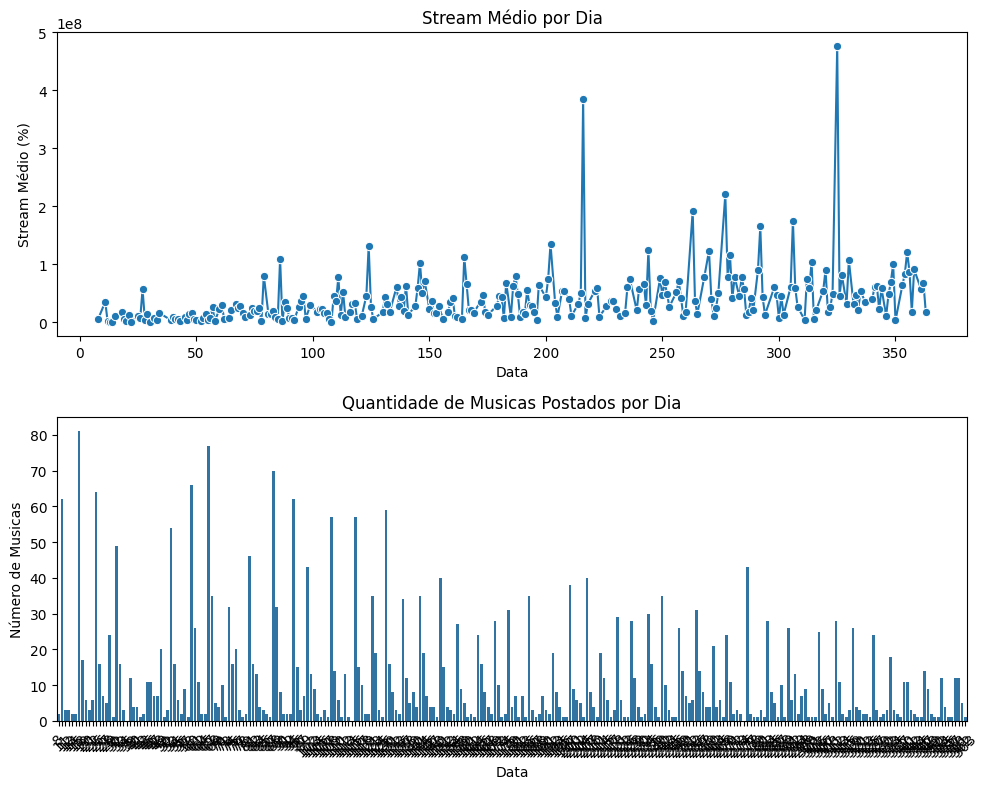

In [89]:
df_grouped = spotify_365_df.groupby('dias_na_plataforma_spoity').agg(
    stream_mean=('Stream', 'mean'), 
    video_count=('Stream', 'count')  # Contando vídeos por dia
).reset_index()
fig, ax1 = plt.subplots(2, 1, figsize=(10, 8)) 

# Gráfico 1: Engajamento médio por dia
sns.lineplot(data=df_grouped, x='dias_na_plataforma_spoity', y='stream_mean', marker='o', ax=ax1[0])
ax1[0].set_title('Stream Médio por Dia')
ax1[0].set_ylabel('Stream Médio (%)')
ax1[0].set_xlabel('Data')

# Gráfico 2: Quantidade de vídeos por dia
sns.barplot(data=df_grouped, x='dias_na_plataforma_spoity', y='video_count', ax=ax1[1])
ax1[1].set_title('Quantidade de Musicas Postados por Dia')
ax1[1].set_ylabel('Número de Musicas')
ax1[1].set_xlabel('Data')

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

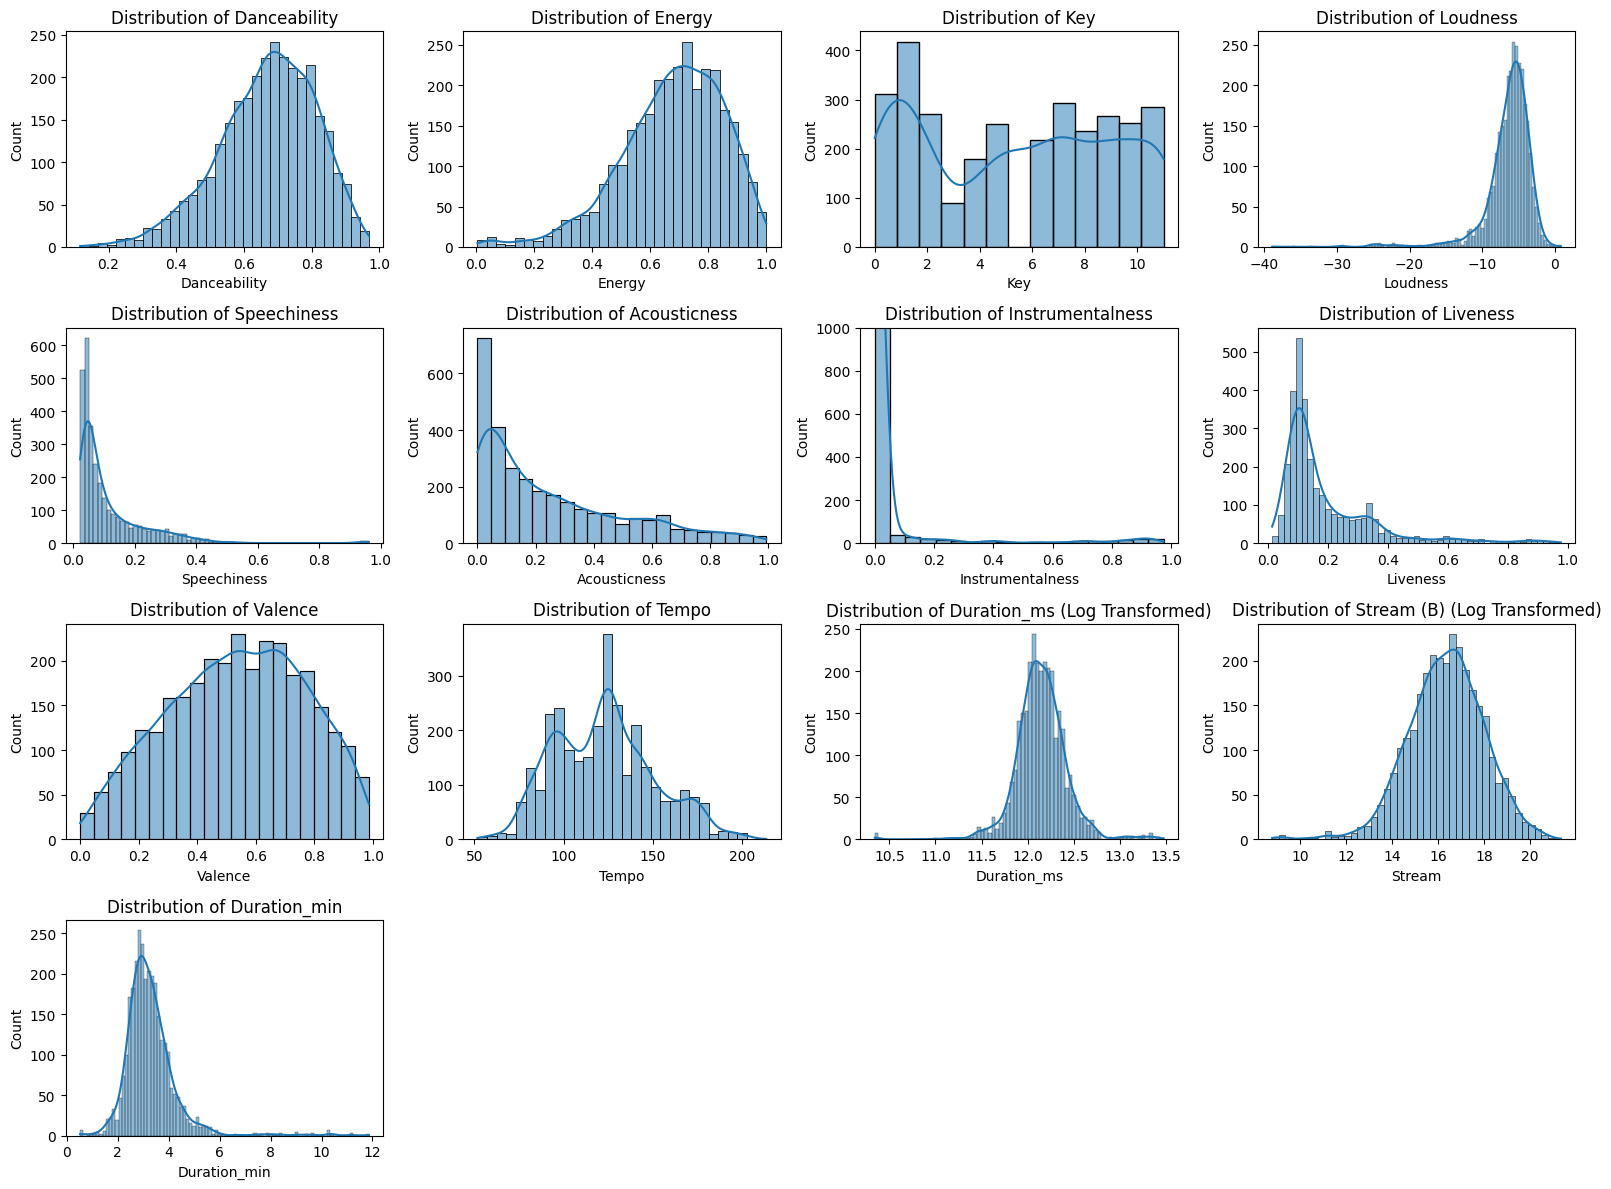

In [90]:
def get_scale_title(col_data, col_name):
    max_val = col_data.max()
    if max_val >= 1e9:
        scale = " (B)"
    elif max_val >= 1e6:
        scale = " (M)"
    else:
        scale = ""
    return f"{col_name}{scale}"

df_numeric = spotify_365_df.select_dtypes(include = ["float64"])


df_log = df_numeric.apply(lambda x: np.log1p(x) if x.max() > 1e5 else x)


plt.figure(figsize = (16, 12))
for i, col in enumerate(df_log, 1):
    plt.subplot(4, 4, i)
    
    
    if col == "Instrumentalness":
        sns.histplot(spotify_365_df[col], kde = True, binwidth = 0.05)
        plt.ylim(0, 1000)
    else:
        sns.histplot(df_log[col], kde = True)
    
    
    title = get_scale_title(df_numeric[col], col)
    plt.title(f"Distribution of {title} (Log Transformed)" if df_numeric[col].max() > 1e5 else f"Distribution of {col}")
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

Total number of outliers in column Duration_min: 140
Lower limit: 1.3345, Upper limit: 5.0126333333333335
-----------------------------------------------------------
Total number of outliers in column Tempo: 6
Lower limit: 40.01650000000001, Upper limit: 199.9885
-----------------------------------------------------------
Total number of outliers in column Stream: 337
Lower limit: -44862916.0, Upper limit: 87023652.0
-----------------------------------------------------------


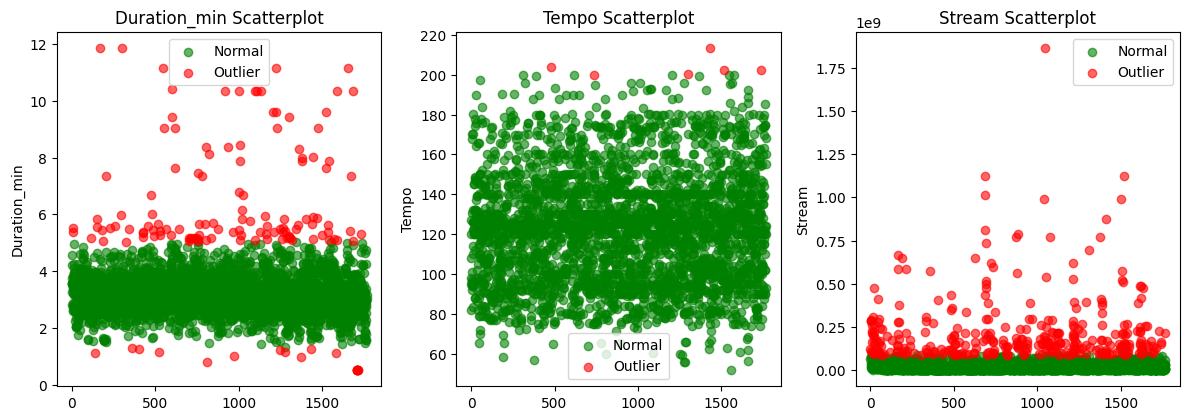

In [91]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


columns_to_check = ["Duration_min","Tempo","Stream"]


plt.figure(figsize = (12, 8))
for i, col in enumerate(columns_to_check, 1):

    outliers, lower, upper = find_outliers_iqr(spotify_365_df, col)

   
    normal_values = spotify_365_df[(spotify_365_df[col] >= lower) & (spotify_365_df[col] <= upper)]

    
    plt.subplot(2, 3, i)
    plt.scatter(normal_values.index, normal_values[col], label = "Normal", alpha = 0.6, c = "green")
    plt.scatter(outliers.index, outliers[col], label = "Outlier", alpha=0.6, c = "red")
    plt.title(f"{col} Scatterplot")
    plt.ylabel(col)
    plt.legend()

    
    print(f"Total number of outliers in column {col}: {len(outliers)}")
    print(f"Lower limit: {lower}, Upper limit: {upper}")
    print("-" * 59)

plt.tight_layout()
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3875095143.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_365_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3875095143.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spotify_365_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
C:\Users\Samsung\AppData\Local\Temp\ipykernel_20524\3875095143.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

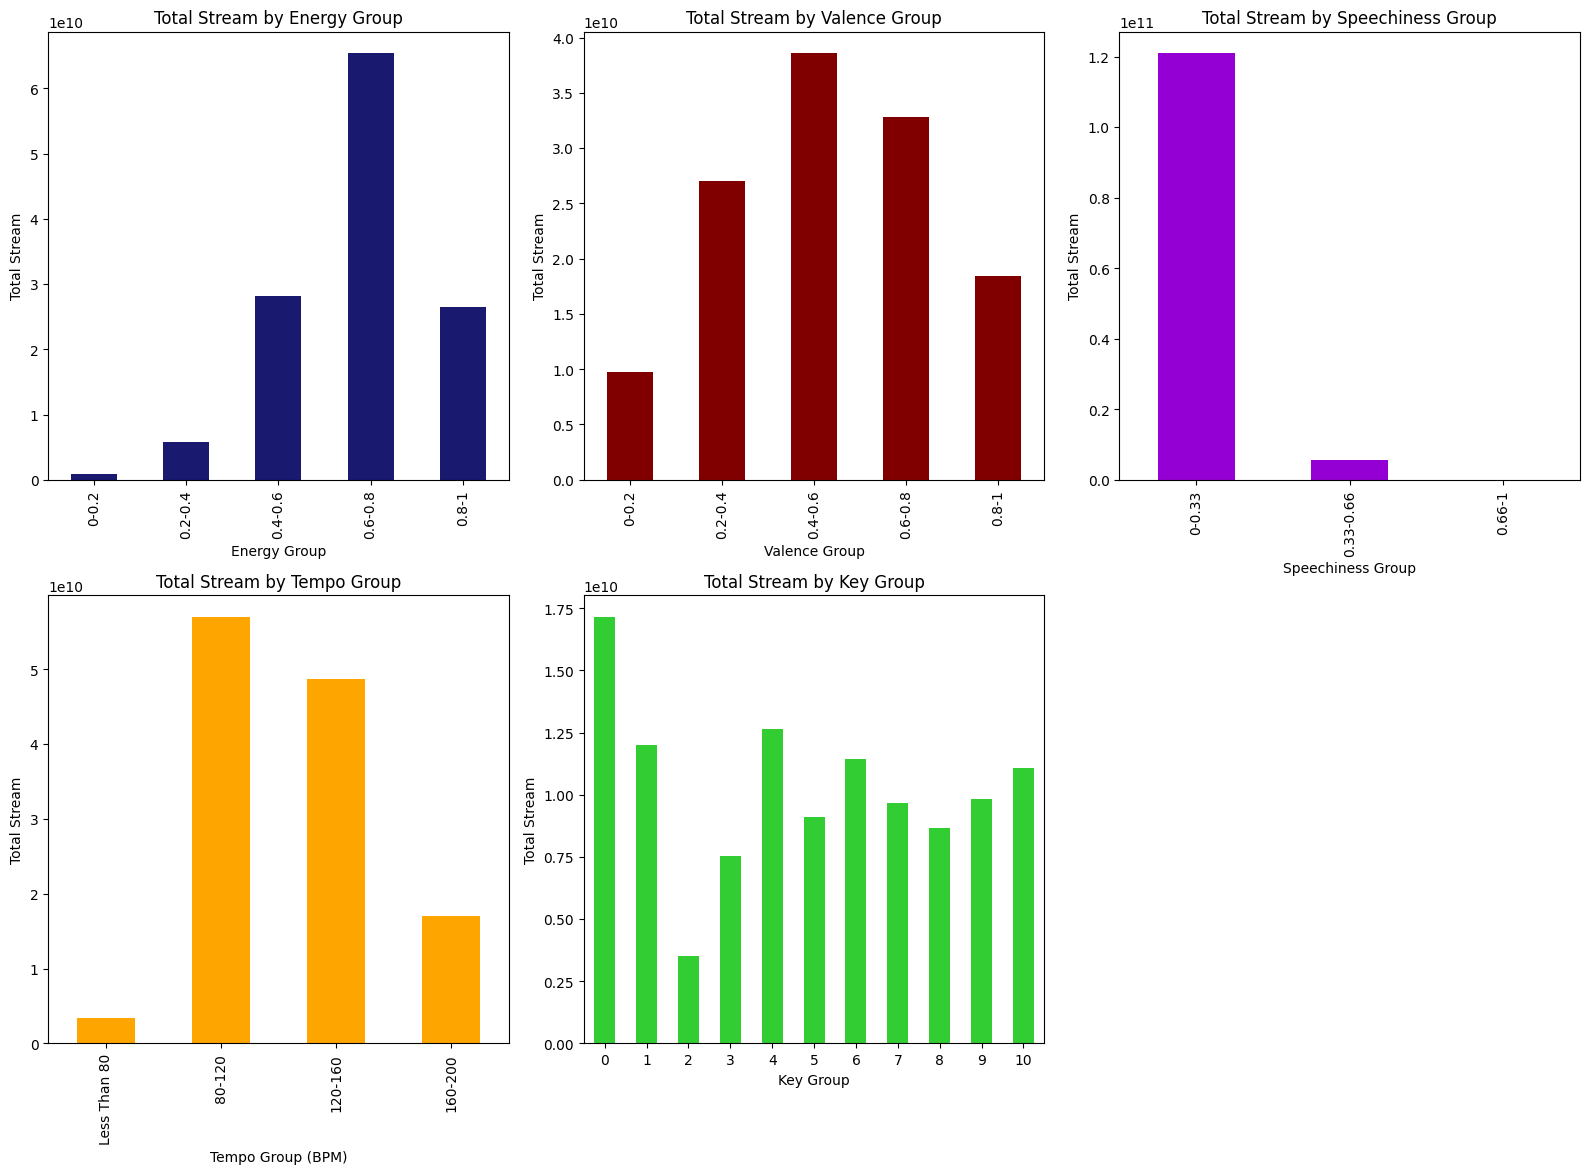

In [92]:
energy_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
valence_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
speechiness_bins = [0, 0.33, 0.66, 1]
tempo_bins = [0, 80, 120, 160, 200]

# Grouping the features into bins
spotify_365_df["Energy_group"] = pd.cut(spotify_365_df["Energy"], bins = energy_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_365_df["Valence_group"] = pd.cut(spotify_365_df["Valence"], bins = valence_bins, labels = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"])
spotify_365_df["Speechiness_group"] = pd.cut(spotify_365_df["Speechiness"], bins = speechiness_bins, labels = ["0-0.33", "0.33-0.66", "0.66-1"])
spotify_365_df["Tempo_group"] = pd.cut(spotify_365_df["Tempo"], bins = tempo_bins, labels = ["Less Than 80", "80-120", "120-160", "160-200"])
spotify_365_df["Key_group"] = pd.cut(spotify_365_df["Key"], bins = range(0, 12), labels = [f"{i}" for i in range(11)])

# Now that we have done the grouping, let's start visualization
plt.figure(figsize = (16, 12))

# Energy
plt.subplot(2, 3, 1)
spotify_365_df.groupby("Energy_group")["Stream"].sum().plot(kind = "bar", color = "midnightblue")
plt.title("Total Stream by Energy Group")
plt.xlabel("Energy Group")
plt.ylabel("Total Stream")

# Valence
plt.subplot(2, 3, 2)
spotify_365_df.groupby("Valence_group")["Stream"].sum().plot(kind = "bar", color = "maroon")
plt.title("Total Stream by Valence Group")
plt.xlabel("Valence Group")
plt.ylabel("Total Stream")

# Speechiness
plt.subplot(2, 3, 3)
spotify_365_df.groupby("Speechiness_group")["Stream"].sum().plot(kind = "bar", color = "darkviolet")
plt.title("Total Stream by Speechiness Group")
plt.xlabel("Speechiness Group")
plt.ylabel("Total Stream")

# Tempo
plt.subplot(2, 3, 4)
spotify_365_df.groupby("Tempo_group")["Stream"].sum().plot(kind = "bar", color = "orange")
plt.title("Total Stream by Tempo Group")
plt.xlabel("Tempo Group (BPM)")
plt.ylabel("Total Stream")

# Key
plt.subplot(2, 3, 5)
spotify_365_df.groupby("Key_group")["Stream"].sum().plot(kind = "bar", color = "limegreen")
plt.title("Total Stream by Key Group")
plt.xlabel("Key Group")
plt.ylabel("Total Stream")
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

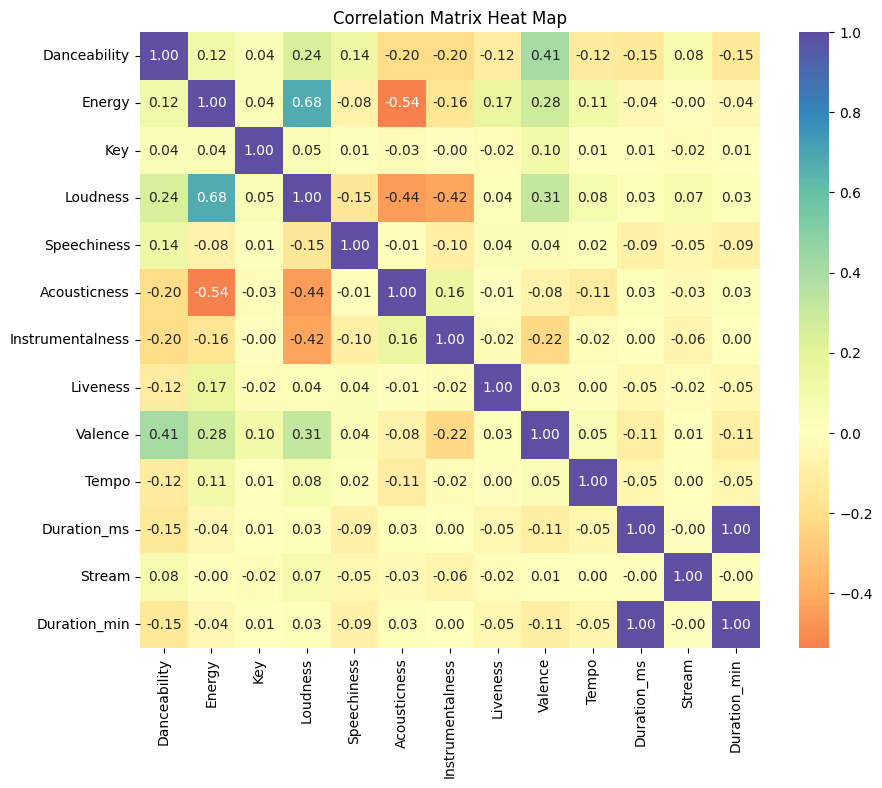

In [93]:
corr_matrix = df_numeric.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Spectral", center = 0, fmt = ".2f")
plt.title("Correlation Matrix Heat Map")
plt.show()

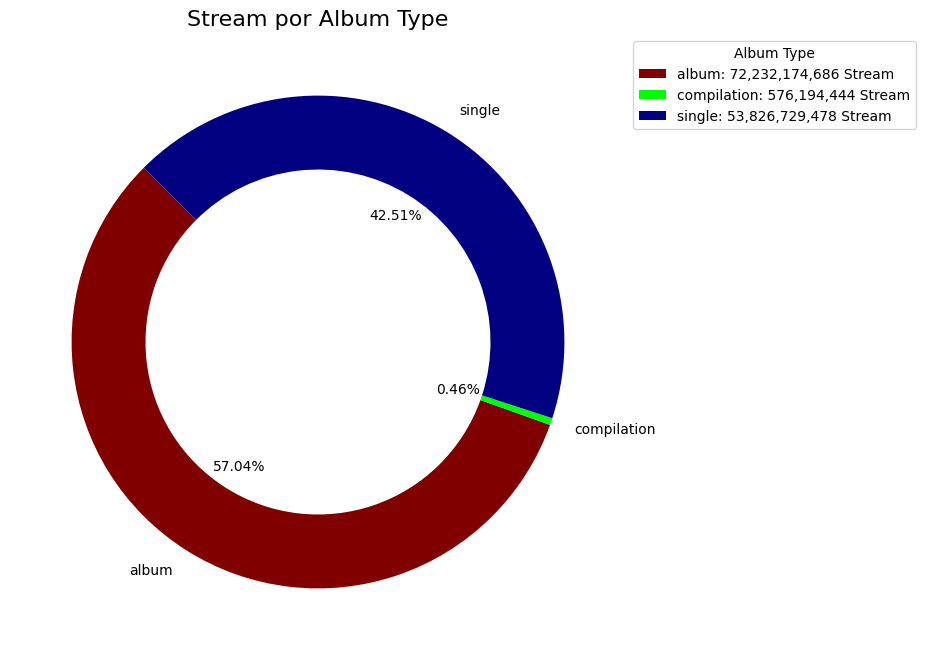

In [94]:
album_views = spotify_365_df.groupby("Album_type")["Stream"].sum()

# Now let's create the Donut Chart.
plt.figure(figsize = (8, 8))

plt.pie(album_views, labels = album_views.index, autopct = "%1.2f%%", startangle = 135, colors = ["maroon", "lime", "navy"], wedgeprops = dict(width = 0.3))
plt.title("Stream por Album Type", fontsize = 16)
plt.legend(labels = [f"{label}: {value:,.0f} Stream" for label, value in zip(album_views.index, album_views)],
           title = "Album Type", loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1))

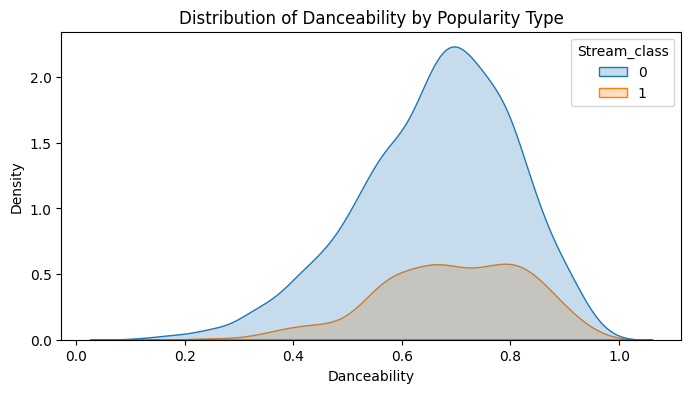

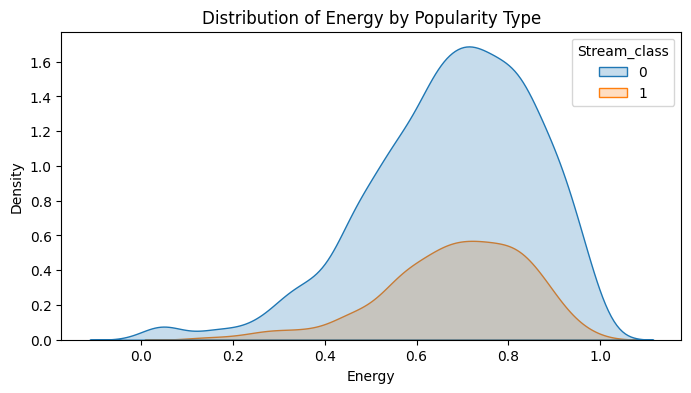

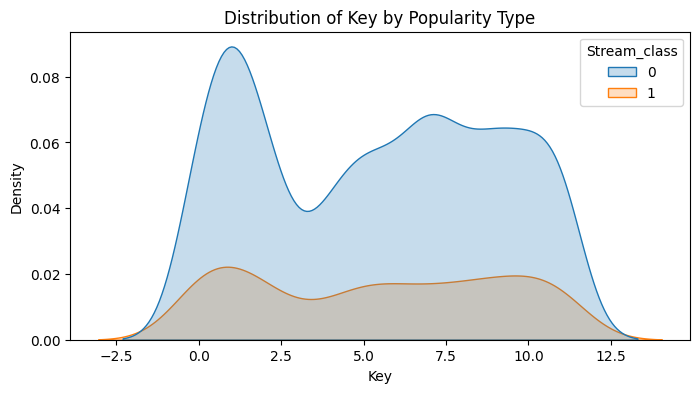

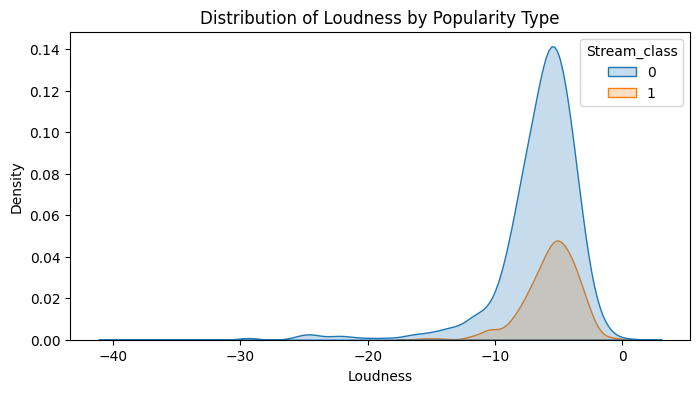

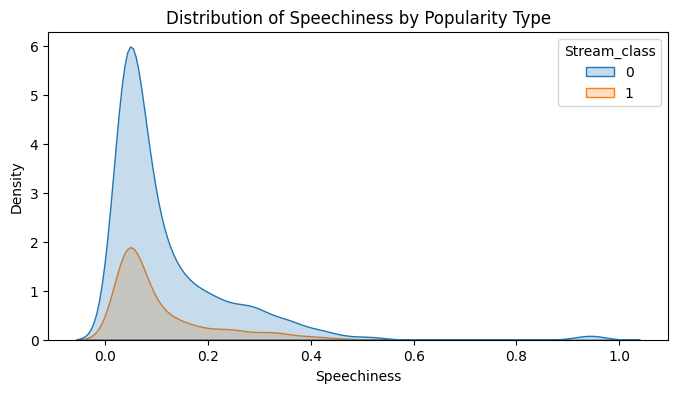

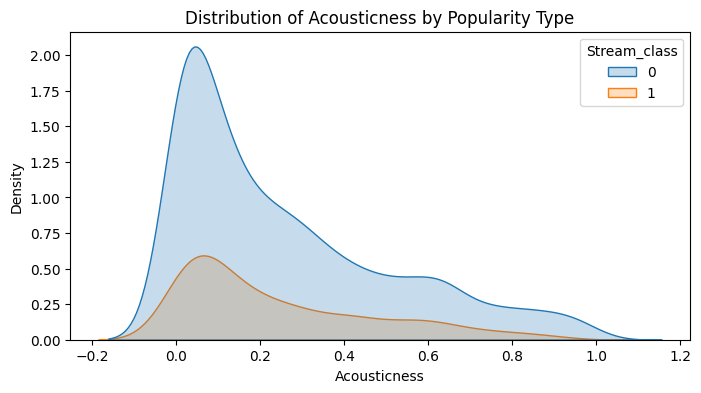

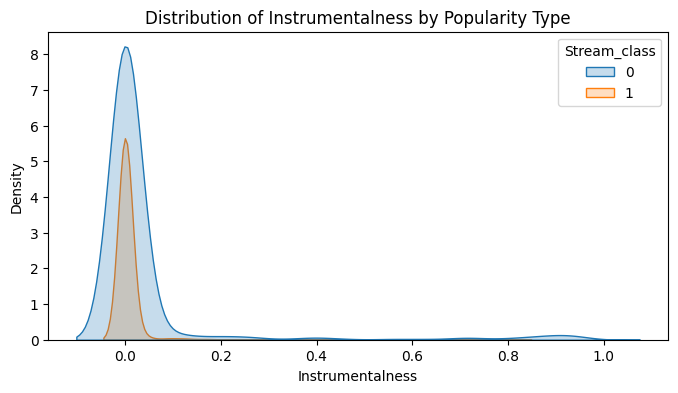

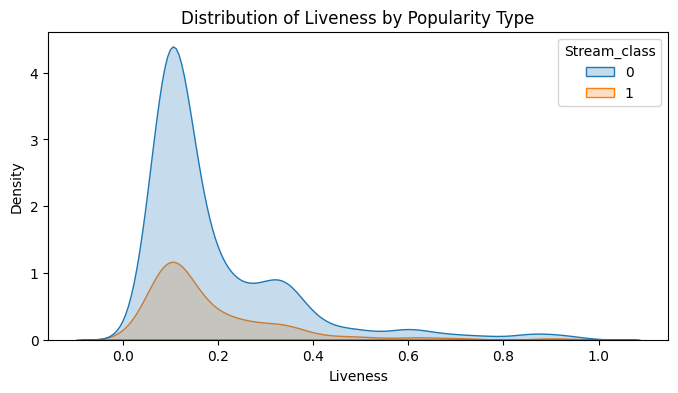

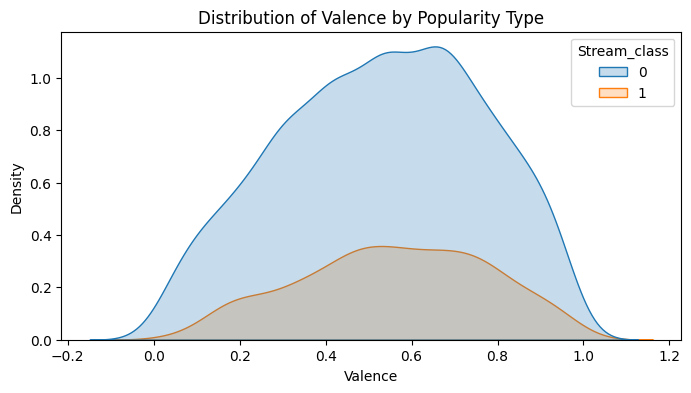

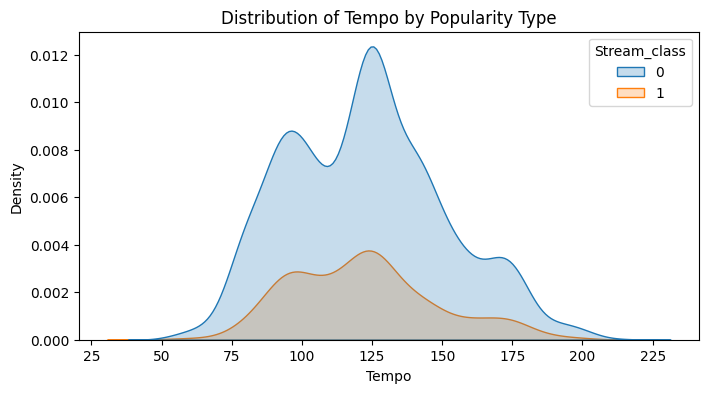

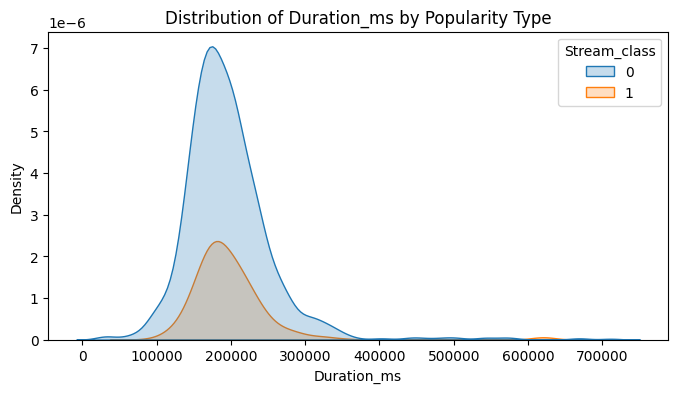

In [95]:
audio_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Duration_ms']
for feature in audio_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=spotify_365_df, x=feature, hue='Stream_class', fill=True)
    plt.title(f'Distribution of {feature} by Popularity Type')
    plt.show()